In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import glob
import os 

import numpy as np 
import regex as re

from datetime import datetime 
import time 
import csv

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns


In [4]:
df = pd.read_csv('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_merged_all_yrs_final.csv')

In [5]:
df.head()

,Unnamed: 0,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,...,EFYWHITW,EFY2MORT,EFY2MORM,EFY2MORW,EFYUNKNT,EFYUNKNM,EFYUNKNW,EFYNRALT,EFYNRALM,EFYNRALW
0,0,2015,100654,AL,Alabama A & M University,5,12,1,1,12,...,60,0,0,0,76,31,45,28,14,14
1,1,2015,100663,AL,University of Alabama at Birmingham,5,11,1,2,12,...,4402,479,177,302,146,74,72,303,180,123
2,2,2015,100690,AL,Amridge University,5,12,1,2,12,...,44,0,0,0,89,40,49,0,0,0
3,3,2015,100706,AL,University of Alabama in Huntsville,5,11,1,2,12,...,1794,116,61,55,252,127,125,240,154,86
4,4,2015,100724,AL,Alabama State University,5,11,1,1,12,...,56,53,17,36,72,30,42,113,65,48


In [6]:
df.drop(['Unnamed: 0'], axis =1, inplace = True)

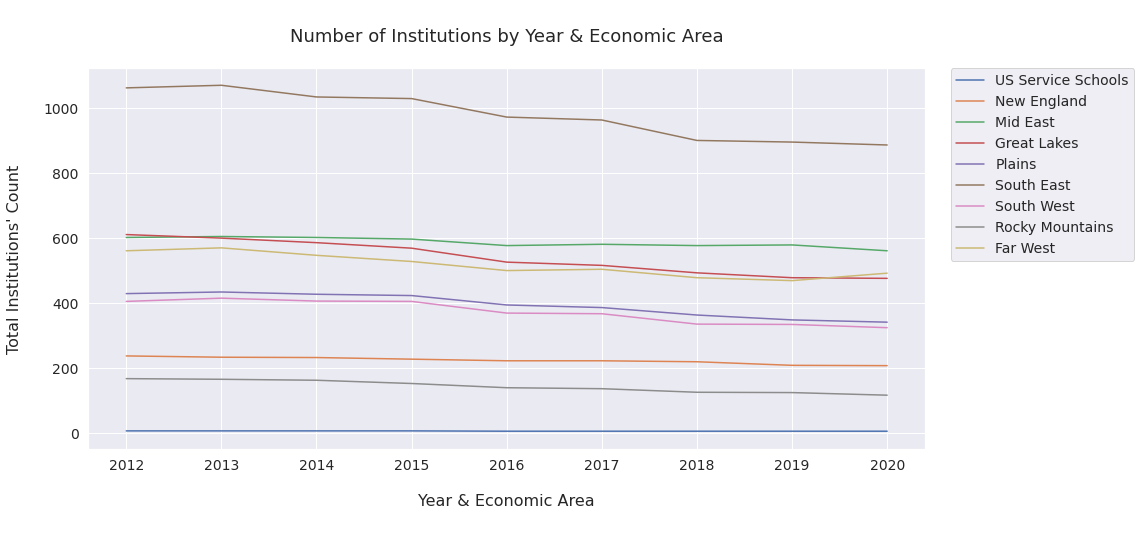

In [7]:
sns.set(rc = {'figure.figsize':(15,7)})

df_graph = (df.loc[lambda df:(df['OBEREG']==0),:].groupby(['YEAR'])['UNITID'].count())

df_graph2 = (df.loc[lambda df:(df['OBEREG']==1),:].groupby(['YEAR'])['UNITID'].count())
df_graph3 = (df.loc[lambda df:(df['OBEREG']==2),:].groupby(['YEAR'])['UNITID'].count())
df_graph4 = (df.loc[lambda df:(df['OBEREG']==3),:].groupby(['YEAR'])['UNITID'].count())
df_graph5 = (df.loc[lambda df:(df['OBEREG']==4),:].groupby(['YEAR'])['UNITID'].count())
df_graph6 = (df.loc[lambda df:(df['OBEREG']==5),:].groupby(['YEAR'])['UNITID'].count())
df_graph7 = (df.loc[lambda df:(df['OBEREG']==6),:].groupby(['YEAR'])['UNITID'].count())
df_graph8 = (df.loc[lambda df:(df['OBEREG']==7),:].groupby(['YEAR'])['UNITID'].count())
df_graph9 = (df.loc[lambda df:(df['OBEREG']==8),:].groupby(['YEAR'])['UNITID'].count())
df_graph10 = (df.loc[lambda df:(df['OBEREG']==9),:].groupby(['YEAR'])['UNITID'].count())
# df_graph
df_concat = pd.concat([df_graph, df_graph2, df_graph3,df_graph4,df_graph5,df_graph6,df_graph7,df_graph8,df_graph9], axis=1)


df_concat
graph_a=df_concat.plot(kind='line', fontsize = 14)

graph_a.set_xlabel("\nYear & Economic Area\n", fontsize=16)
graph_a.set_ylabel("Total Institutions' Count\n", fontsize=16)
graph_a.set_title('\nNumber of Institutions by Year & Economic Area\n', fontsize=18)

plt.legend(labels=['US Service Schools','New England','Mid East','Great Lakes',
                       'Plains','South East','South West','Rocky Mountains','Far West','Outlying Areas'], fontsize = 14, bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_HEIS_by_Year_and_Economic_Area.png")

# OBEREG = indicates the Bureau of Economic ANalysis Regions the US is divided into 
# MD is in region 2

# 0 - US Service schools

# 1 - New England CT ME MA NH RI VT
# 2 - Mid East DE DC MD NJ NY PA

# 3 - Great Lakes IL IN MI OH WI
# 4 - Plains IA KS MN MO NE ND SD

# 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV

# 6 - Southwest AZ NM OK TX
# 7 - Rocky Mountains CO ID MT UT WY
# 8 - Far West AK CA HI NV OR WA

# 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 

# -3 - Not available

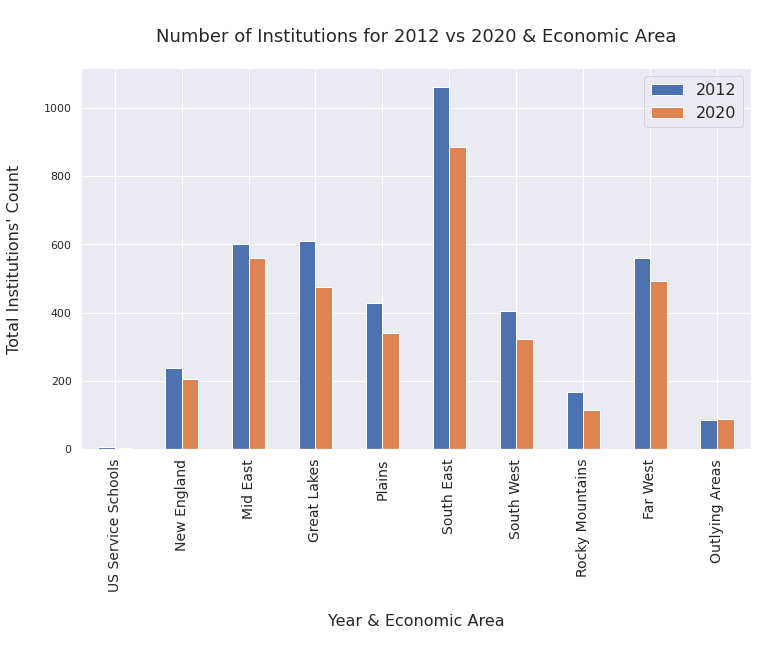

In [8]:

sns.set(rc = {'figure.figsize':(12,7)})

df_graph = (df.loc[lambda df:(df['YEAR']==2012),:].groupby(['OBEREG'])['UNITID'].count())
df_graph9 = (df.loc[lambda df:(df['YEAR']==2020),:].groupby(['OBEREG'])['UNITID'].count())


df_concat = pd.concat([df_graph,df_graph9], axis=1)
df_concat
graph_a=df_concat.plot(kind='bar')
graph_a.set_xlabel("\nYear & Economic Area\n",fontsize=16)
graph_a.set_ylabel("Total Institutions' Count\n", fontsize=16)
graph_a.set_title('\nNumber of Institutions for 2012 vs 2020 & Economic Area\n', fontsize=18)
graph_a.set_xticklabels(['US Service Schools','New England','Mid East','Great Lakes',
                       'Plains','South East','South West','Rocky Mountains','Far West','Outlying Areas'], fontsize = 14)
graph_a.legend(labels=['2012','2020'], fontsize=16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_HEIS_by_Economic_Area_2012_vs_2020.png")

# df_graph

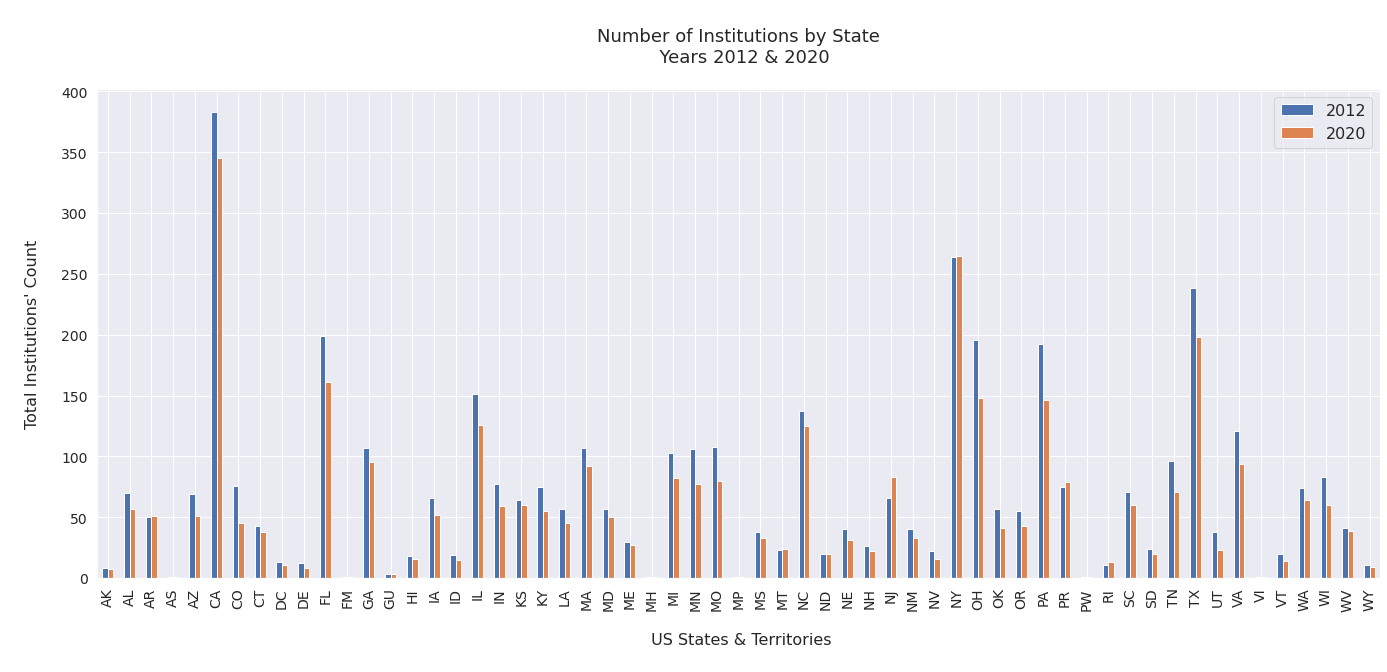

In [9]:


sns.set(rc = {'figure.figsize':(23,9)})

df_grapha = (df.loc[lambda df:(df['YEAR']==2012),:].groupby(['STABBR'])['UNITID'].count())
df_graph2a = (df.loc[lambda df:(df['YEAR']==2020),:].groupby(['STABBR'])['UNITID'].count())

df_concata = pd.concat([df_grapha, df_graph2a], axis=1)
df_concata
graph_b=df_concata.plot(kind='bar', fontsize=14)
graph_b.set_xlabel("\n US States & Territories\n", fontsize=16)
graph_b.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_b.set_title('\nNumber of Institutions by State\n  Years 2012 & 2020\n', fontsize=18)
graph_b.legend(labels=['2012','2020'], fontsize=16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_HEIS_by_State_2012_vs_2020.png")

In [10]:

# df_by_year=df.groupby(['YEAR'])['STABBR'].value_counts()
# graph5=df_by_year[:59].plot(kind='bar', fontsize = 14)
# graph5.set_xlabel("\nStates & Territories", fontsize=16)
# graph5.set_ylabel("Total N. of Institutions in 2012\n", fontsize = 16)
# graph5.set_title('N. of Institutions by State (2012)', fontsize = 18)

# #  # Graph information repeated below using seaborn instead


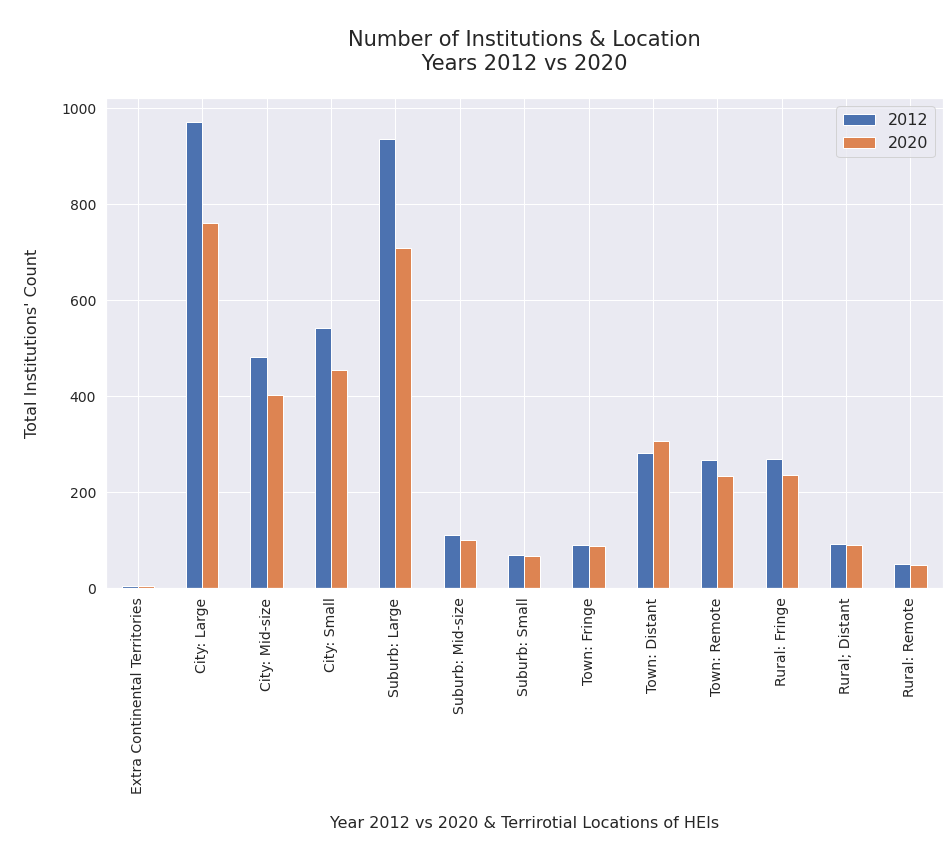

In [11]:

sns.set(rc = {'figure.figsize':(15,9)})

df_gb = (df.loc[lambda df:(df['YEAR']==2012),:].groupby(['LOCALE'])['UNITID'].count())
df_g2b = (df.loc[lambda df:(df['YEAR']==2020),:].groupby(['LOCALE'])['UNITID'].count())

df_con_b = pd.concat([df_gb, df_g2b], axis=1)
df_con_b
graph_c=df_con_b.plot(kind='bar',fontsize=14)
graph_c.set_xlabel("\nYear 2012 vs 2020 & Terrirotial Locations of HEIs\n", fontsize= 16)
graph_c.set_ylabel("\nTotal Institutions' Count\n", fontsize= 16)
graph_c.set_title('\nNumber of Institutions & Location\n Years 2012 vs 2020 \n', fontsize= 21)
graph_c.legend(labels=['2012','2020'], fontsize= 16)
graph_c.set_xticklabels(['Extra Continental Territories','City: Large','City: Mid-size','City: Small',
                       'Suburb: Large','Suburb: Mid-size','Suburb: Small','Town: Fringe','Town: Distant','Town: Remote',
                       'Rural: Fringe', 'Rural; Distant', 'Rural: Remote'], fontsize = 14)
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_HEIS_by_Location_2012_vs_2020.png")


# -3 = Not applicable (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the Virgin Islands,  
#      were not assigned a locale code because the geographic and 
#      governmental structures of these entities do not fit the definitional scheme used to derive the code.)

# 11 = City: Large: Territory inside an urbanized area and inside a principal city with population of 250,000 or more. 

# 12 = City: Midsize: Territory inside an urbanized area and inside a principal city with population less than 250,000 and greater than or equal to 100,000.

# 13 = City: Small: Territory inside an urbanized area and inside a principal city with population less than 100,000.

# 21 = Suburb: Large: Territory outside a principal city and inside an urbanized area with population of 250,000 or more.

# 22 = Suburb: Midsize: Territory outside a principal city and inside an urbanized area with population less than 250,000 and greater than or equal to 100,000.

# 23 = Suburb: Small: Territory outside a principal city and inside an urbanized area with population less than 100,000.

# 31 = Town: Fringe: Territory inside an urban cluster that is less than or equal to 10 miles from an urbanized area.

# 32 = Town: Distant: Territory inside an urban cluster that is more than 10 miles and less than or equal to 35 miles from an urbanized area.

# 33 = Town: Remote: Territory inside an urban cluster that is more than 35 miles of an urbanized area.

# 41 - Rural: Fringe: Census-defined rural territory that is less than or equal to 5 miles from an urbanized area, as well as rural territory that is less than or equal to 2.5 miles from an urban cluster. 

# 42 = Rural: Distant: Census-defined rural territory that is more than 5 miles but less than or equal to 25 miles from an urbanized area, as well as rural territory that is more than 2.5 miles but less than or equal to 10 miles from an urban cluster. 

# 43 = Rural: Remote: Census-defined rural territory that is more than 25 miles from an urbanized area and is also more than 10 miles from an urban cluster.

In [12]:
df['CNTLAFFI'].unique()

# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)

array([1, 4, 2, 3])

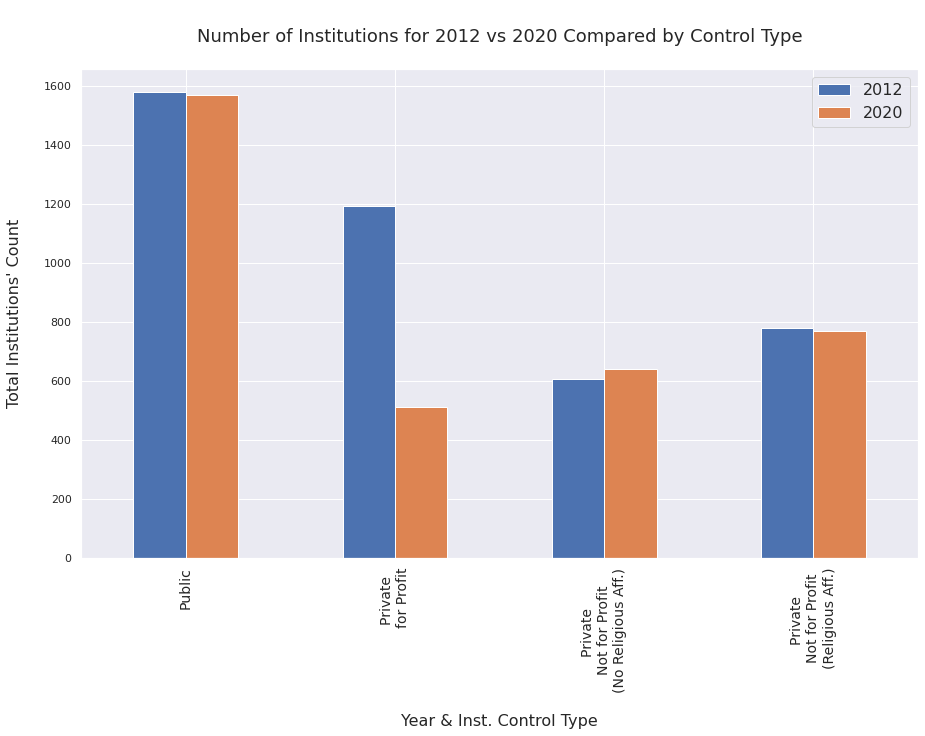

In [13]:
sns.set(rc = {'figure.figsize':(15,9)})

df_graph = (df.loc[lambda df:(df['YEAR']==2012),:].groupby(['CNTLAFFI'])['UNITID'].count())
df_graph9 = (df.loc[lambda df:(df['YEAR']==2020),:].groupby(['CNTLAFFI'])['UNITID'].count())

# df_concat = pd.concat([df_graph, df_graph2, df_graph3,df_graph4,df_graph5,df_graph6,df_graph7,df_graph8,df_graph9], axis=1)

df_concat = pd.concat([df_graph,df_graph9], axis=1)
df_concat
graph_a=df_concat.plot(kind='bar')
graph_a.set_xlabel("\nYear & Inst. Control Type",fontsize=16)
graph_a.set_ylabel("Total Institutions' Count\n", fontsize=16)
graph_a.set_title('\nNumber of Institutions for 2012 vs 2020 Compared by Control Type\n', fontsize=18)
graph_a.set_xticklabels(['Public', 'Private \nfor Profit', 'Private \nNot for Profit\n(No Religious Aff.)', 'Private \nNot for Profit\n(Religious Aff.)'], fontsize = 14)
graph_a.legend(labels=['2012','2020'], fontsize=16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_HEIS_by_Control_Type_2012_vs_2020.png")
# df_graph

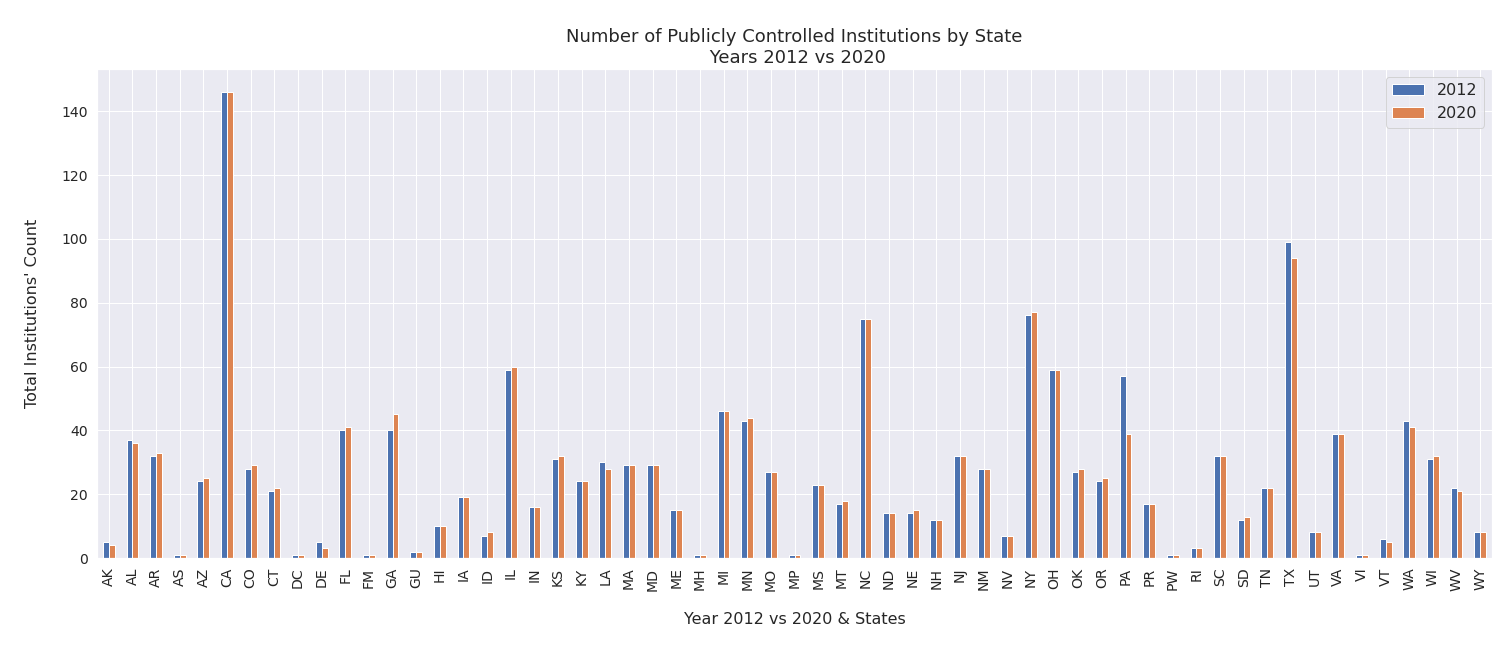

In [14]:
df_public = df.loc[lambda df:(df['CNTLAFFI']==1),:]

sns.set(rc = {'figure.figsize':(25,9)})

df_grapha = (df_public.loc[lambda df_public:(df_public['YEAR']==2012),:].groupby(['STABBR'])['UNITID'].count())
df_graph2a = (df_public.loc[lambda df_public:(df_public['YEAR']==2020),:].groupby(['STABBR'])['UNITID'].count())

df_concata = pd.concat([df_grapha, df_graph2a], axis=1)
df_concata
graph_b=df_concata.plot(kind='bar', fontsize=14)
graph_b.set_xlabel("\nYear 2012 vs 2020 & States\n", fontsize=16)
graph_b.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_b.set_title('\nNumber of Publicly Controlled Institutions by State\n Years 2012 vs 2020', fontsize=18)
graph_b.legend(labels=['2012','2020'], fontsize=16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Public_HEIS_by_State_2012_vs_2020.png")
# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)


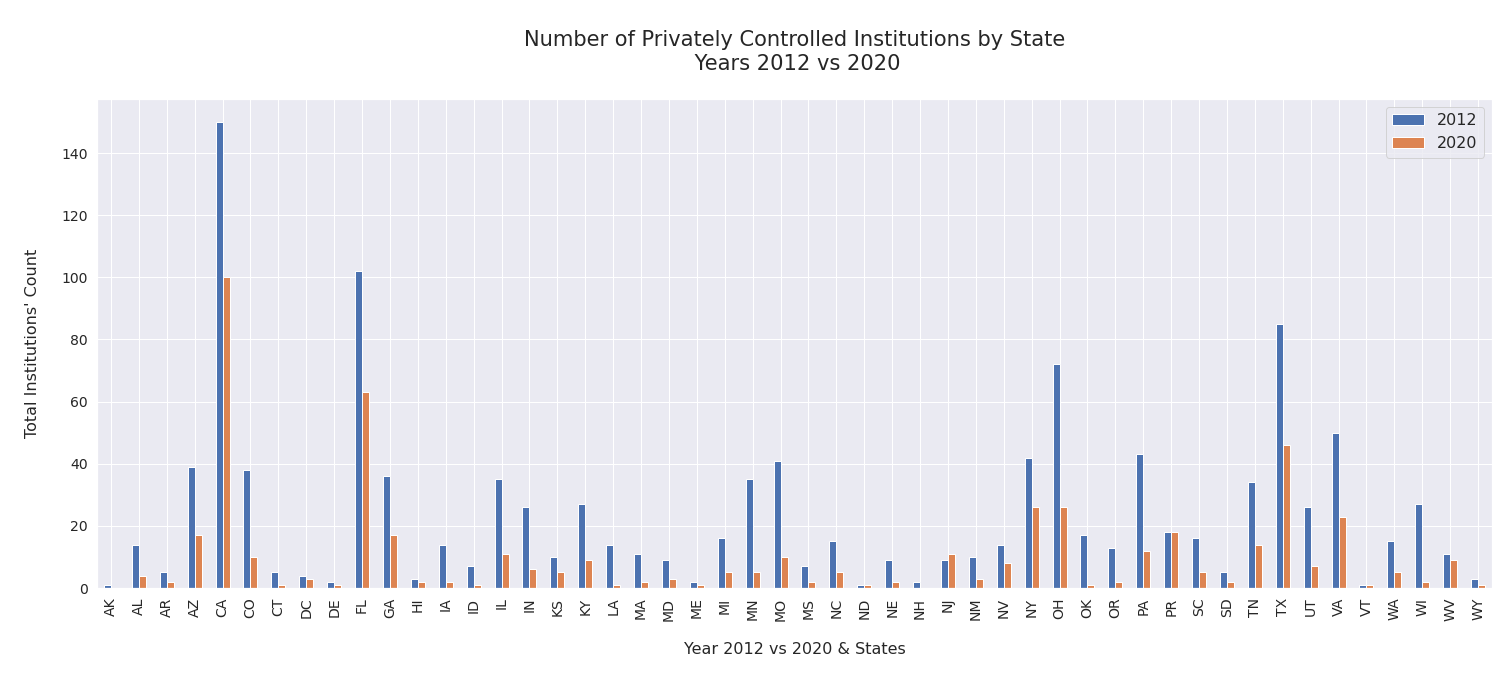

In [15]:
df_private = df.loc[lambda df:(df['CNTLAFFI']==2),:]

sns.set(rc = {'figure.figsize':(25,9)})

df_grapha = (df_private.loc[lambda df_private:(df_private['YEAR']==2012),:].groupby(['STABBR'])['UNITID'].count())
df_graph2a = (df_private.loc[lambda df_private:(df_private['YEAR']==2020),:].groupby(['STABBR'])['UNITID'].count())

df_concata = pd.concat([df_grapha, df_graph2a], axis=1)
df_concata
graph_b=df_concata.plot(kind='bar', fontsize=14)
graph_b.set_xlabel("\nYear 2012 vs 2020 & States\n", fontsize=16)
graph_b.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_b.set_title('\nNumber of Privately Controlled Institutions by State\n Years 2012 vs 2020\n', fontsize=21)
graph_b.legend(labels=['2012','2020'], fontsize=16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Private_HEIS_by_State_2012_vs_2020.png")
# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)


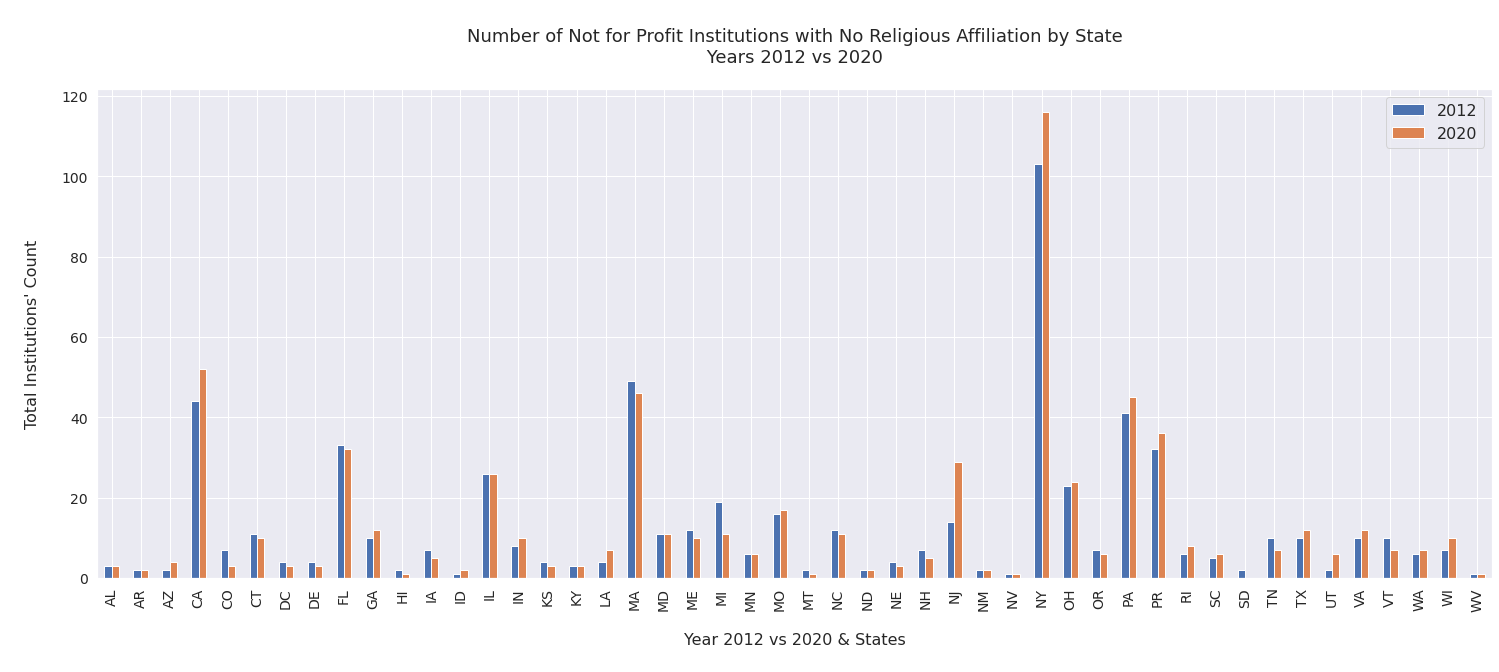

In [16]:
df_nfp_nrel = df.loc[lambda df:(df['CNTLAFFI']==3),:]

sns.set(rc = {'figure.figsize':(25,9)})

df_grapha = (df_nfp_nrel.loc[lambda df_nfp_nrel:(df_nfp_nrel['YEAR']==2012),:].groupby(['STABBR'])['UNITID'].count())
df_graph2a = (df_nfp_nrel.loc[lambda df_nfp_nrel:(df_nfp_nrel['YEAR']==2020),:].groupby(['STABBR'])['UNITID'].count())

df_concata = pd.concat([df_grapha, df_graph2a], axis=1)
df_concata
graph_b=df_concata.plot(kind='bar', fontsize=14)
graph_b.set_xlabel("\nYear 2012 vs 2020 & States\n", fontsize=16)
graph_b.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_b.set_title('\nNumber of Not for Profit Institutions with No Religious Affiliation by State\n Years 2012 vs 2020 \n', fontsize=18)
graph_b.legend(labels=['2012','2020'], fontsize=16)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Not_for_Profit_NRA_HEIS_by_State_2012_vs_2020.png")

# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)

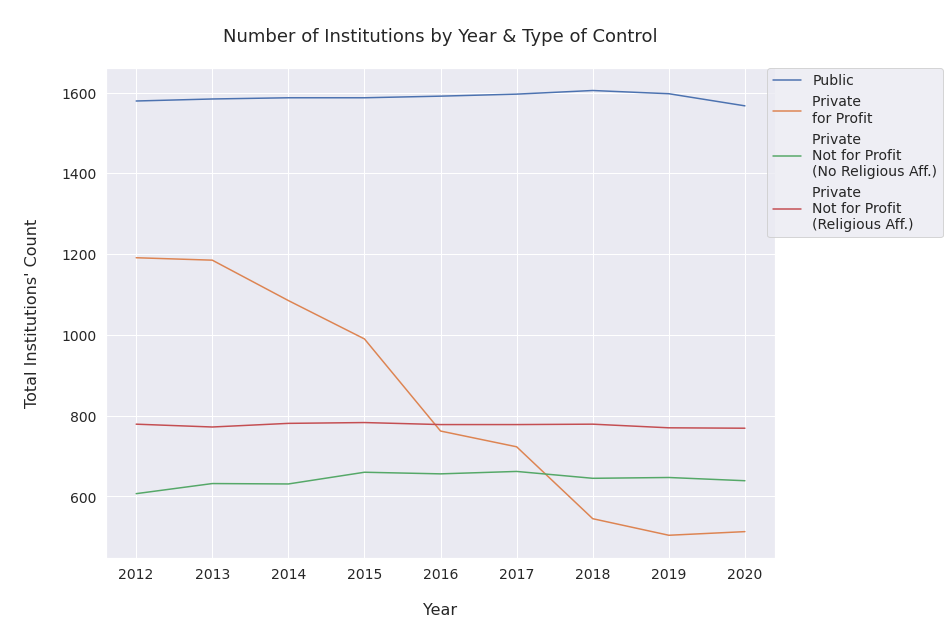

In [17]:
sns.set(rc = {'figure.figsize':(12,9)})
df_graph = (df.loc[lambda df:(df['CNTLAFFI']==1),:].groupby(['YEAR'])['UNITID'].count()) # CNTLAFFI	1	Public

df_graph2 = (df.loc[lambda df:(df['CNTLAFFI']==2),:].groupby(['YEAR'])['UNITID'].count()) # CNTLAFFI	4	Private not-for-profit (religious affiliation)
df_graph3 = (df.loc[lambda df:(df['CNTLAFFI']==3),:].groupby(['YEAR'])['UNITID'].count()) # CNTLAFFI	2	Private for-profit
df_graph4 = (df.loc[lambda df:(df['CNTLAFFI']==4),:].groupby(['YEAR'])['UNITID'].count()) # CNTLAFFI	3	Private not-for-profit (no religious affiliation)

df_concat = pd.concat([df_graph, df_graph2, df_graph3,df_graph4], axis=1)

df_concat
graph_a=df_concat.plot(kind='line', fontsize = 14)

graph_a.set_xlabel("\nYear\n", fontsize=16)
graph_a.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_a.set_title('\nNumber of Institutions by Year & Type of Control\n', fontsize=18)

graph_a.legend(labels=['Public', 'Private \nfor Profit','Private \nNot for Profit\n(No Religious Aff.)', 'Private \nNot for Profit\n(Religious Aff.)' ], 
               fontsize = 14, bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_HEIS_by_Year_and_Type_of_Control.png")

# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)



In [18]:
# df_graph_n

In [19]:
# df_public['CNTLAFFI']

# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)


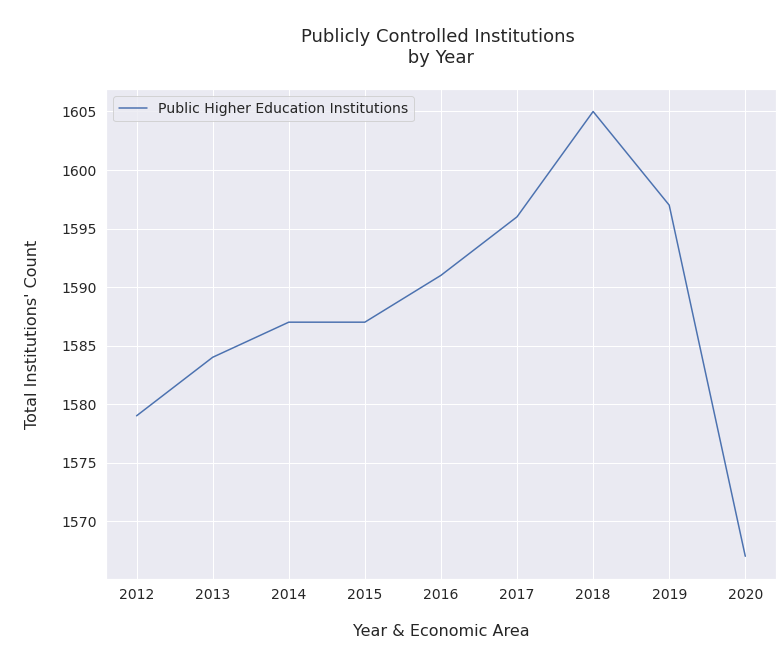

In [20]:
sns.set(rc = {'figure.figsize':(12,9)})

df_graph_n = df_public.groupby(['YEAR'])['UNITID'].count()

# df_concat
graph_a=df_graph_n.plot(kind='line', fontsize = 14)

graph_a.set_xlabel("\nYear & Economic Area\n", fontsize=16)
graph_a.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_a.set_title('\nPublicly Controlled Institutions \n by Year \n', fontsize=18)

graph_a.legend(labels=['Public Higher Education Institutions'], fontsize = 14)
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Publicly_Controlled_HEIS_by_Year.png")

# df_private

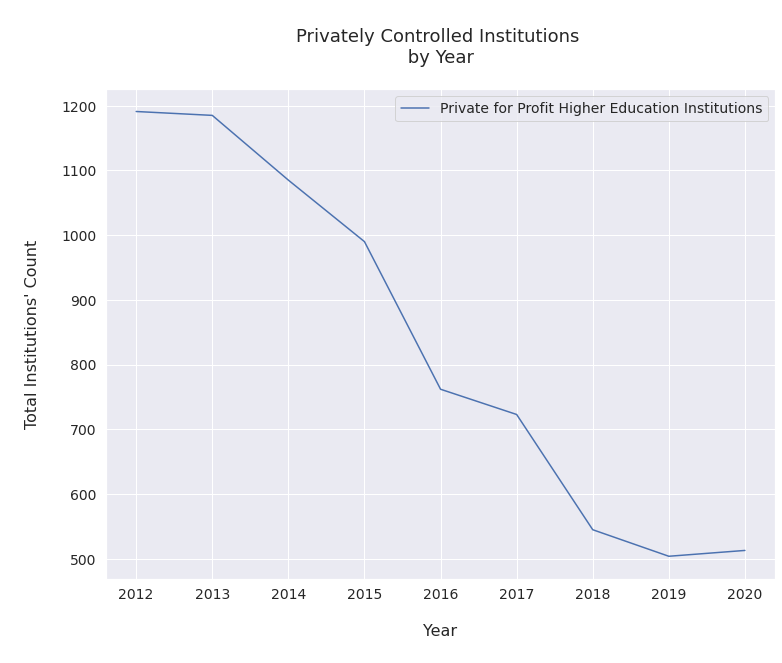

In [21]:
sns.set(rc = {'figure.figsize':(12,9)})

df_graph_n = df_private.groupby(['YEAR'])['UNITID'].count()

# df_concat
graph_a=df_graph_n.plot(kind='line', fontsize = 14)

graph_a.set_xlabel("\nYear\n", fontsize=16)
graph_a.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_a.set_title('\nPrivately Controlled Institutions \n by Year \n', fontsize=18)

graph_a.legend(labels=['Private for Profit Higher Education Institutions'], fontsize = 14)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_For_Profit_HEIS_by_Year.png")

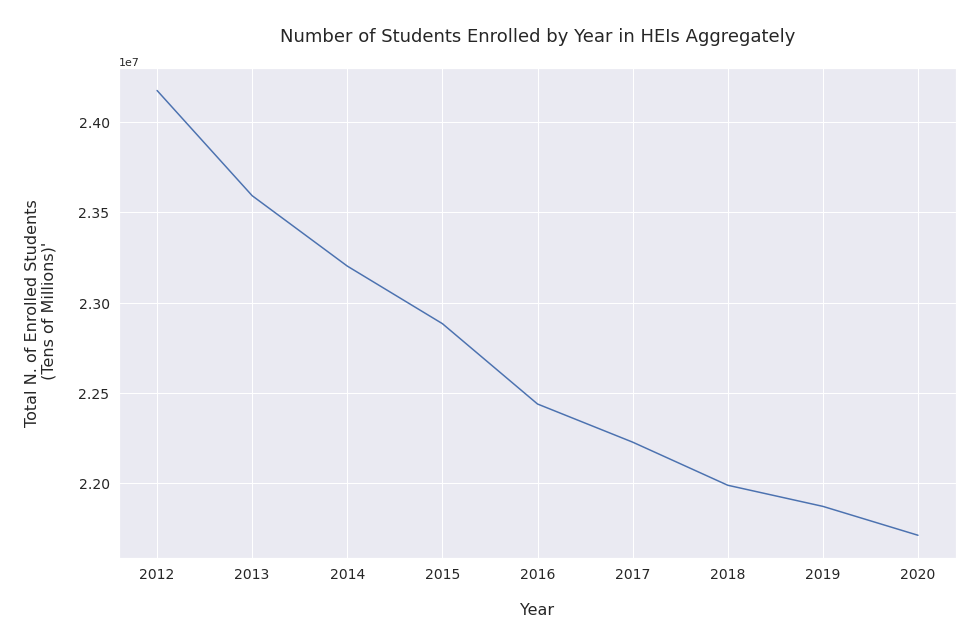

In [22]:
sns.set(rc = {'figure.figsize':(15,9)})
df_graph1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()
# df_graph1


graph_a=df_graph1.plot(kind='line', fontsize = 14)

graph_a.set_xlabel("\nYear\n", fontsize=16)
graph_a.set_ylabel("\nTotal N. of Enrolled Students\n (Tens of Millions)'\n", fontsize=16)
graph_a.set_title('\nNumber of Students Enrolled by Year in HEIs Aggregately\n', fontsize=18)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_in_HEIS_by_Year.png")


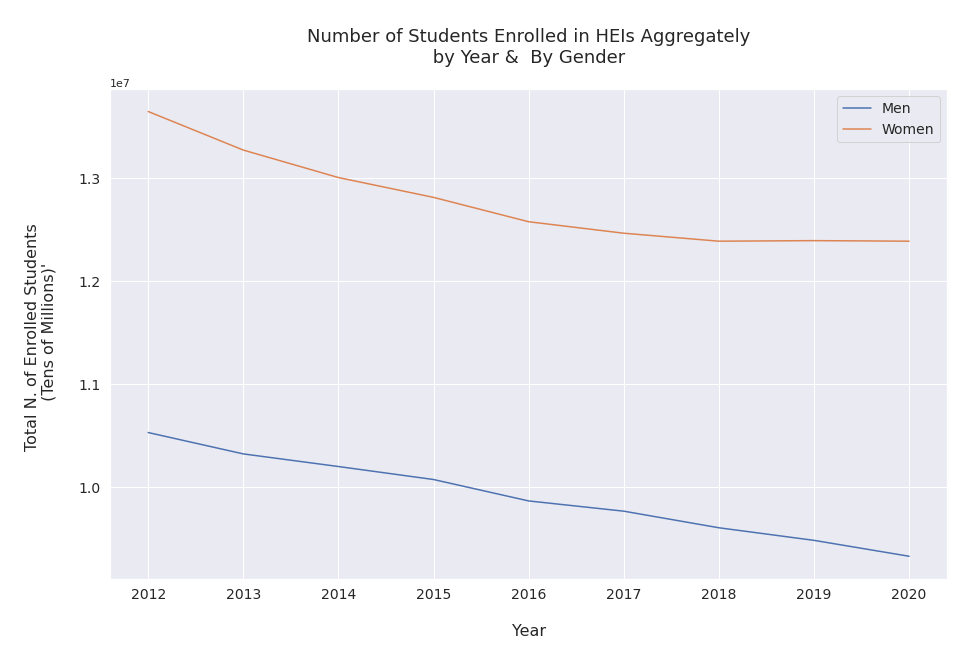

In [23]:
sns.set(rc = {'figure.figsize':(15,9)})
df_graph1 = df.groupby(['YEAR'])['EFYTOTLM'].sum()
df_graph2 = df.groupby(['YEAR'])['EFYTOTLW'].sum()
# df_graph1

df_concat = pd.concat([df_graph1, df_graph2], axis=1)

df_concat
graph_a=df_concat.plot(kind='line', fontsize = 14)

# graph_a=df_graph1.plot(kind='line', fontsize = 14)

graph_a.set_xlabel("\nYear\n", fontsize=16)
graph_a.set_ylabel("\nTotal N. of Enrolled Students \n (Tens of Millions)'\n", fontsize=16)
graph_a.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Year &  By Gender \n', fontsize=18)

graph_a.legend(labels=['Men', 'Women'], 
               fontsize = 14)
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_in_HEIS_by_Gender_and_Year.png")

In [24]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT', 'EFYTOTLM', 'EFYTOTLW', 'EFYAIANT', 'EFYAIANM', 'EFYAIANW',
       'EFYASIAT', 'EFYASIAM', 'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM', 'EFYBKAAW',
       'EFYHISPT', 'EFYHISPM', 'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM', 'EFYNHPIW',
       'EFYWHITT', 'EFYWHITM', 'EFYWHITW', 'EFY2MORT', 'EFY2MORM', 'EFY2MORW',
       'EFYUNKNT', 'EFYUNKNM', 'EFYUNKNW', 'EFYNRALT', 'EFYNRALM', 'EFYNRALW'],
      

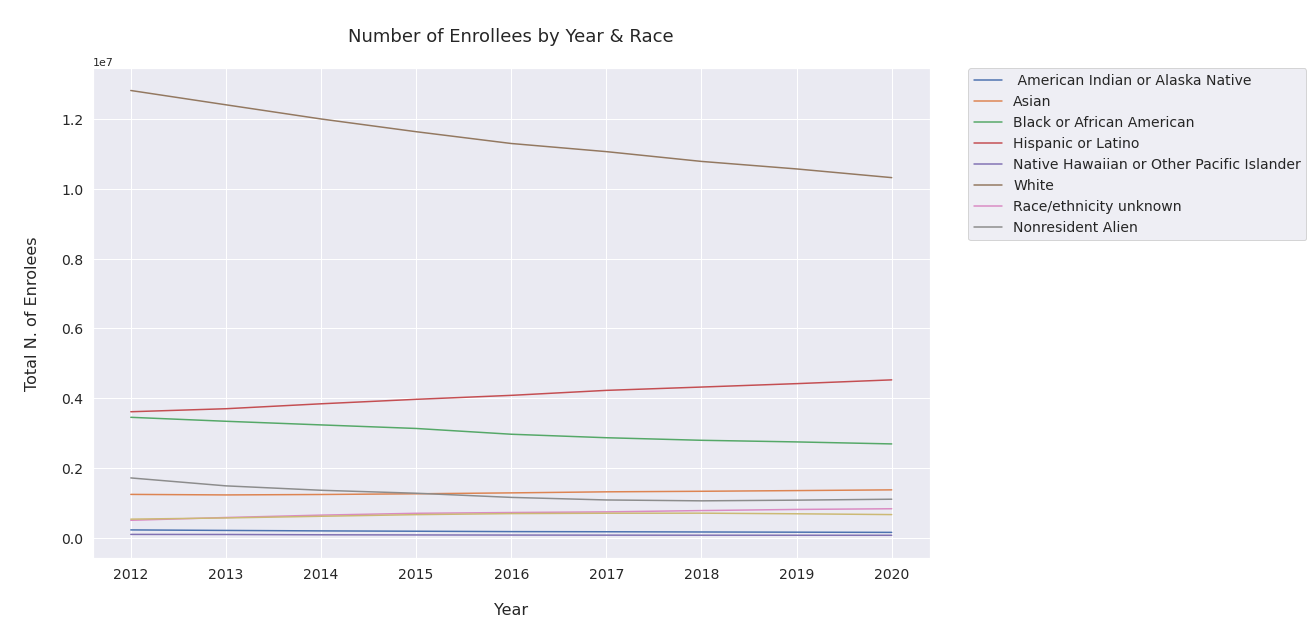

In [25]:
sns.set(rc = {'figure.figsize':(15,9)})
df_graph1 = df.groupby(['YEAR'])['EFYAIANT'].sum()  # American Indian or Alaska Native total

df_graph3 = df.groupby(['YEAR'])['EFYASIAT'].sum()  # Asian total

df_graph5 = df.groupby(['YEAR'])['EFYBKAAT'].sum() # Black or African American total

df_graph7 = df.groupby(['YEAR'])['EFYHISPT'].sum() # Hispanic or Latino total

df_graph9 = df.groupby(['YEAR'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

df_graph11 = df.groupby(['YEAR'])['EFYWHITT'].sum() # White total

df_graph13 = df.groupby(['YEAR'])['EFY2MORT'].sum() # Two or more races total

df_graph15 = df.groupby(['YEAR'])['EFYUNKNT'].sum() # Race/ethnicity unknown total

df_graph18 = df.groupby(['YEAR'])['EFYNRALT'].sum() # Nonresident alien total

df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
                       df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_concat
graph_a=df_concat.plot(kind='line', fontsize = 14)


graph_a.set_xlabel("\nYear\n", fontsize=16)
graph_a.set_ylabel("\nTotal N. of Enrolled Students \n (Tens of Millions)'\n", fontsize=16)
graph_a.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Year &  By Gender \n', fontsize=18)

graph_a.set_xlabel("\nYear\n", fontsize=16)
graph_a.set_ylabel("\nTotal N. of Enrolees\n", fontsize=16)
graph_a.set_title('\nNumber of Enrollees by Year & Race\n', fontsize=18)


graph_a.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
                       'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
               fontsize = 14, bbox_to_anchor=(1.45, 1), loc='upper right', borderaxespad=0)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_in_HEIS_by_Race_and_by_Year.png")

### Based on the graph  it seems that the group of enrollees that has increased the most over the years 2012-2020 is the Hispanic & Latino student population. 
### This is in line with the emphasis placed at policy level on increasing the educational opportunities available to minority students put in motion by the Obama administration through their Deptartment of Education budget priorities. 

### The number of  enrollee of White enthicity/Race is the group that has contracted the most over the period.

### Enrollees who identify as African American or Black seem to have also contracted to a certain degree as have the Native Hawaian or  or Pacific Islanders


### Worthy of note is the fact that Race/Ethnic group Unknown and Non Resident Alien's enrollments have stayed flat throughout the period. 
### This seems a little peculiar and while investigating these numbers is not part of my research purpose, I think there may be some accountign error or under-counting error taking place here 

### Finally looking at the numbers of erollees that identify as Asian we can see that their enthic group has slightly increased in number.

INSTSIZE
1    1540
2    1521
3     500
4     367
5     226
Name: UNITID, dtype: int64
INSTSIZE
1    1115
2    1389
3     463
4     309
5     211
Name: UNITID, dtype: int64


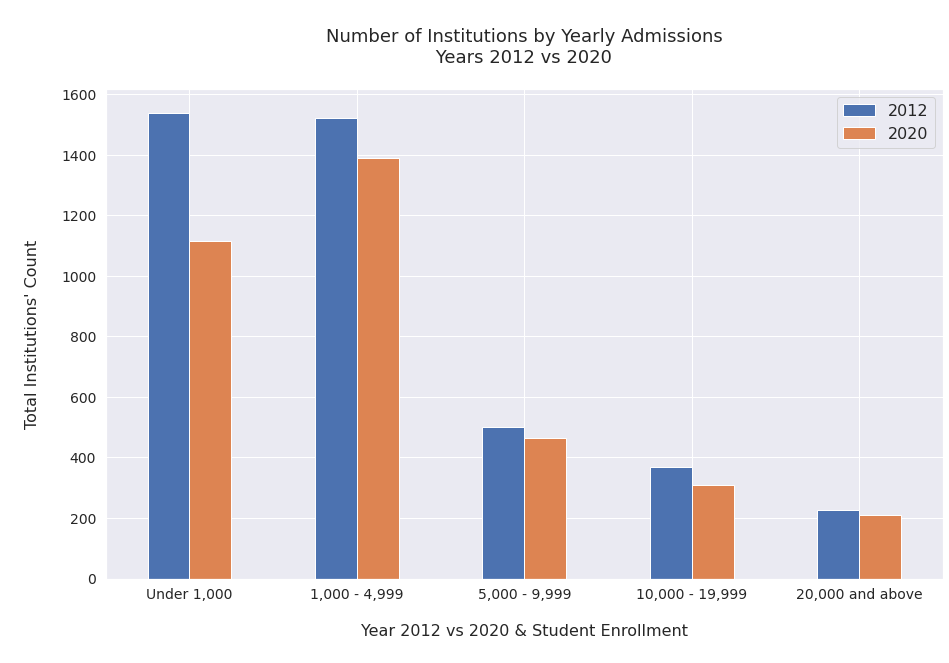

In [26]:
sns.set(rc = {'figure.figsize':(15,9)})

df_nn = df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:].copy(deep=False)
# df_nn['INSTSIZE'].value_counts()
a=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:].groupby(['INSTSIZE'])['UNITID'].count()
b=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:].groupby(['INSTSIZE'])['UNITID'].count()
print(a)
print(b)

# sns.set(rc = {'figure.figsize':(25,9)})

df_graphab = (df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:].groupby(['INSTSIZE'])['UNITID'].count())
df_graph2ab = (df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:].groupby(['INSTSIZE'])['UNITID'].count())

df_concata = pd.concat([df_graphab, df_graph2ab], axis=1)
df_concata
graph_ba=df_concata.plot(kind='bar', fontsize=14)
graph_ba.set_xlabel("\nYear 2012 vs 2020 & Student Enrollment\n", fontsize=16)
graph_ba.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_ba.set_title('\nNumber of Institutions by Yearly Admissions\n Years 2012 vs 2020 \n', fontsize=18)
# graph_ba.legend(labels=['2012','2020'], fontsize=16)

graph_ba.set_xticklabels(['Under 1,000', '1,000 - 4,999', '5,000 - 9,999', '10,000 - 19,999', '20,000 and above'], fontsize = 14, rotation = 0)
graph_ba.legend(labels=['2012','2020'], fontsize=16)

# 1	Under 1,000
# 2	1,000 - 4,999
# 3	5,000 - 9,999
# 4	10,000 - 19,999
# 5	20,000 and above

#
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_BY_HEIs_Size_2012_vs_2020.png")

In [27]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT', 'EFYTOTLM', 'EFYTOTLW', 'EFYAIANT', 'EFYAIANM', 'EFYAIANW',
       'EFYASIAT', 'EFYASIAM', 'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM', 'EFYBKAAW',
       'EFYHISPT', 'EFYHISPM', 'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM', 'EFYNHPIW',
       'EFYWHITT', 'EFYWHITM', 'EFYWHITW', 'EFY2MORT', 'EFY2MORM', 'EFY2MORW',
       'EFYUNKNT', 'EFYUNKNM', 'EFYUNKNW', 'EFYNRALT', 'EFYNRALM', 'EFYNRALW'],
      

In [28]:
df['HDEGOFFR'].value_counts()

40    11814
20     7525
30     7466
11     3271
12     2432
13     1667
14      384
Name: HDEGOFFR, dtype: int64

In [29]:

degrees = (df['HDEGOFFR'].values)

degrees_new = []

for i in range (len(degrees)):
  if 10< degrees[i] <15:
    degrees_new.append(10)
  else:
    degrees_new.append(degrees[i])

# print(degrees_new)    
# 
df['HDEGOFFR_NEW']=degrees_new
df.drop(['HDEGOFFR'], axis=1, inplace=True)
df.rename(columns={"HDEGOFFR_NEW": "HDEGOFFR"}, errors="raise", inplace=True)

df.head()  

,YEAR,UNITID,STABBR,INSTNM,OBEREG,GROFFER,HBCU,LOCALE,INSTCAT,INSTSIZE,...,EFY2MORT,EFY2MORM,EFY2MORW,EFYUNKNT,EFYUNKNM,EFYUNKNW,EFYNRALT,EFYNRALM,EFYNRALW,HDEGOFFR
0,2015,100654,AL,Alabama A & M University,5,1,1,12,2,3,...,0,0,0,76,31,45,28,14,14,10
1,2015,100663,AL,University of Alabama at Birmingham,5,1,2,12,2,4,...,479,177,302,146,74,72,303,180,123,10
2,2015,100690,AL,Amridge University,5,1,2,12,2,1,...,0,0,0,89,40,49,0,0,0,10
3,2015,100706,AL,University of Alabama in Huntsville,5,1,2,12,2,3,...,116,61,55,252,127,125,240,154,86,10
4,2015,100724,AL,Alabama State University,5,1,1,12,2,3,...,53,17,36,72,30,42,113,65,48,10


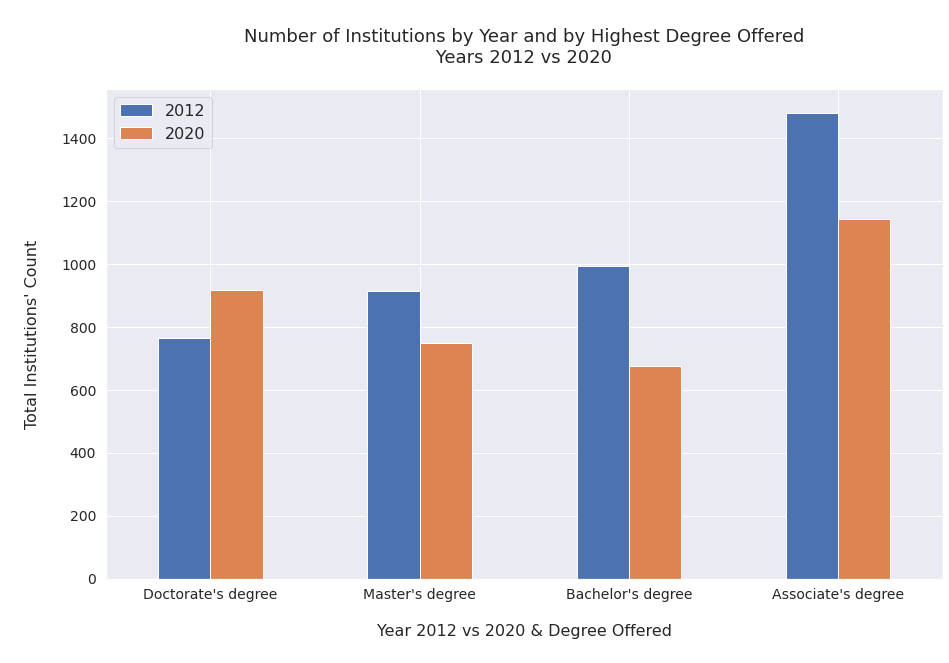

In [30]:
sns.set(rc = {'figure.figsize':(15,9)})

df_nn = df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:].copy(deep=False)

# aa=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:].groupby(['HDEGOFFR'])['UNITID'].count()
# bb=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:].groupby(['HDEGOFFR'])['UNITID'].count()
# print(aa)
# print(bb)

# sns.set(rc = {'figure.figsize':(25,9)})

df_graphabc = (df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:].groupby(['HDEGOFFR'])['UNITID'].count())
df_graph2abc = (df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:].groupby(['HDEGOFFR'])['UNITID'].count())

df_concata_abc = pd.concat([df_graphabc, df_graph2abc], axis=1)
df_concata_abc
graph_aba=df_concata_abc.plot(kind='bar', fontsize=14)
graph_aba.set_xlabel("\nYear 2012 vs 2020 & Degree Offered\n", fontsize=16)
graph_aba.set_ylabel("\nTotal Institutions' Count\n", fontsize=16)
graph_aba.set_title('\nNumber of Institutions by Year and by Highest Degree Offered\n Years 2012 vs 2020 \n', fontsize=18)
# graph_ba.legend(labels=['2012','2020'], fontsize=16)

graph_aba.set_xticklabels(["Doctorate's degree", "Master's degree", "Bachelor's degree", "Associate's degree"], fontsize = 14, rotation = 0)
graph_aba.legend(labels=['2012','2020'], fontsize=16)

# 11	Doctor's degree - research/scholarship and professional practice
# 12	Doctor's degree - research/scholarship
# 13	Doctor's degree -  professional practice
# 14	Doctor's degree - other
# 20	Master's degree
# 30	Bachelor's degree
# 40	Associate's degree


#
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_BY_HEIs_Size_2012_vs_2020.png")

In [31]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'GROFFER', 'HBCU',
       'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
       'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83',
       'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
       'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1',
       'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP', 'RMANDBRDAMT',
       'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6',
       'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM', 'EFYTOTLT',
       'EFYTOTLM', 'EFYTOTLW', 'EFYAIANT', 'EFYAIANM', 'EFYAIANW', 'EFYASIAT',
       'EFYASIAM', 'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM', 'EFYBKAAW', 'EFYHISPT',
       'EFYHISPM', 'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM', 'EFYNHPIW', 'EFYWHITT',
       'EFYWHITM', 'EFYWHITW', 'EFY2MORT', 'EFY2MORM', 'EFY2MORW', 'EFYUNKNT',
       'EFYUNKNM', 'EFYUNKNW', 'EFYNRALT', 'EFYNRALM', 'EFYNRALW', 'HDEGOFFR'],
      

In [32]:
sns.set(rc = {'figure.figsize':(30,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
labels = ddf['OBEREG']
# print(labels)

#2012
df_graph1 = ddf.groupby(['OBEREG'])['EFYAIANT'].sum()  # American Indian or Alaska Native total
df_graph3 = ddf.groupby(['OBEREG'])['EFYASIAT'].sum()  # Asian total
df_graph5 = ddf.groupby(['OBEREG'])['EFYBKAAT'].sum() # Black or African American total
df_graph7 = ddf.groupby(['OBEREG'])['EFYHISPT'].sum() # Hispanic or Latino total
df_graph9 = ddf.groupby(['OBEREG'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total
df_graph11 = ddf.groupby(['OBEREG'])['EFYWHITT'].sum() # White total
df_graph13 = ddf.groupby(['OBEREG'])['EFY2MORT'].sum() # Two or more races total
df_graph15 = ddf.groupby(['OBEREG'])['EFYUNKNT'].sum() # Race/ethnicity unknown total
df_graph18 = ddf.groupby(['OBEREG'])['EFYNRALT'].sum() # Nonresident alien total

#2020
df_graph1c = cdf.groupby(['OBEREG'])['EFYAIANT'].sum()  # American Indian or Alaska Native total
df_graph3c = cdf.groupby(['OBEREG'])['EFYASIAT'].sum()  # Asian total
df_graph5c = cdf.groupby(['OBEREG'])['EFYBKAAT'].sum() # Black or African American total
df_graph7c = cdf.groupby(['OBEREG'])['EFYHISPT'].sum() # Hispanic or Latino total
df_graph9c = cdf.groupby(['OBEREG'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total
df_graph11c = cdf.groupby(['OBEREG'])['EFYWHITT'].sum() # White total
df_graph13c = cdf.groupby(['OBEREG'])['EFY2MORT'].sum() # Two or more races total
df_graph15c = cdf.groupby(['OBEREG'])['EFYUNKNT'].sum() # Race/ethnicity unknown total
df_graph18c = cdf.groupby(['OBEREG'])['EFYNRALT'].sum() # Nonresident alien total

df_concat_2020 = pd.concat([df_graph1c, df_graph3c, df_graph5c, df_graph7c, df_graph9c, 
                             df_graph11c, df_graph13c, df_graph15c, df_graph18c], axis=1)
# 
df_concat_2012 = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
                       df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_concat_2020.rename(columns={'EFYAIANT':"AMIND.ALNAT.", 'EFYASIAT':"ASIAN", 'EFYBKAAT':"BLK.AFAM", 'EFYHISPT':"HISP.LAT.", 'EFYNHPIT':"NATHAW.PACISL", 
                               'EFYWHITT':"WHITE",'EFY2MORT':"TWO.MORE", 'EFYUNKNT':"UNKNOWN", 'EFYNRALT':"NONRES.ALIEN"}, errors="raise", inplace=True)

df_concat_2012.rename(columns={'EFYAIANT':"AMIND.ALNAT.", 'EFYASIAT':"ASIAN", 'EFYBKAAT':"BLK.AFAM", 'EFYHISPT':"HISP.LAT.", 'EFYNHPIT':"NATHAW.PACISL", 
                               'EFYWHITT':"WHITE",'EFY2MORT':"TWO.MORE", 'EFYUNKNT':"UNKNOWN", 'EFYNRALT':"NONRES.ALIEN"}, errors="raise", inplace=True)

df_concat_all=pd.concat([df_concat_2012, df_concat_2020], keys=['2012', '2020'])
df_concat_all
# print(df_concat_all.index)
# df_concat_all.index.names

# df_concat_all.plot.bar(stacked=True,x=df_concat_all.index);

# MultiIndex([('2012', 1),
#             ('2012', 2),
#             ('2012', 3),
#             ('2012', 4),
#             ('2012', 5),
#             ('2012', 6),
#             ('2012', 7),
#             ('2012', 8),
#             ('2020', 1),
#             ('2020', 2),
#             ('2020', 3),
#             ('2020', 4),
#             ('2020', 5),
#             ('2020', 6),
#             ('2020', 7),
#             ('2020', 8)],
#            names=[None, 'OBEREG'])

# df_concat_all.plot.barh(stacked=True)


# df = pd.DataFrame(
#     3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=['x', 'y']
# )
# index=df_concat_all.index

# graph_ac=df_concat_all.plot(kind='pie', fontsize = 14, subplots=True)


# graph_ac.set_xlabel("\nEconomic Area by Race\n", fontsize=16)
# graph_ac.set_ylabel("\nTotal N. of Enrolled Students \n (Tens of Millions)'\n", fontsize=16)
# graph_ac.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Race & Economic Area\n', fontsize=18)
# graph_ac.set_xticklabels(['New England','Mid East','Great Lakes','Plains','South East','South \nWest','Rocky \nMountains','Far West'], fontsize = 14, rotation=0)

# graph_ac.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
#                          'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
#                  fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

# plt.show()


AMIND.ALNAT.   ASIAN  BLK.AFAM  HISP.LAT.  NATHAW.PACISL  \
     OBEREG                                                             
2012 1               3775   42956     76008      83887            921   
     2              10346  191015    512490     353130           5869   
     3              19389  107817    516162     246227           5800   
     4              25459   48836    233885      95800           4236   
     5              30258  135742   1337066     476538          12776   
     6              76836  126124    437356     854605           8199   
     7              16903   21888     46279      95464           4346   
     8              37725  561254    288058    1152770          34899   
2020 1               3387   55669    102715     123933           1293   
     2               8366  229406    442047     447180           4780   
     3              11540  125481    328323     311274           3514   
     4              15905   53728    128533     113566           2478   
     5              23098  167407   1062735     623436           9933   
     6              51737  150479    329044    1050076           6142   
     7              12969   27796     48585     142919           4917   
     8              22982  555227    240378    1518015          25130   

               WHITE  TWO.MORE  UNKNOWN  NONRES.ALIEN  
     OBEREG                                            
2012 1        596048     18191   115919         34560  
     2       1652667     46075   241625        102224  
     3       2437383     61236   236847         70647  
     4       1356737     38858   134207         49027  
     5       3009171     91430   313429         83595  
     6       1446229     60907   234931         63218  
     7        676602     18743    82091         18115  
     8       1636874    159381   344375        107168  
2020 1        577088     36196    85234         46879  
     2       1336441     88619   142989        129119  
     3       1872811    104233   121965         84592  
     4        986534     53136    72637         47221  
     5       2554602    171195   198234        114335  
     6       1077287    105166   124743         63096  
     7        685366     44934    73401         27647  
     8       1223456    223106   278156        146538

In [33]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'GROFFER', 'HBCU',
       'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
       'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83',
       'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
       'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1',
       'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP', 'RMANDBRDAMT',
       'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6',
       'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM', 'EFYTOTLT',
       'EFYTOTLM', 'EFYTOTLW', 'EFYAIANT', 'EFYAIANM', 'EFYAIANW', 'EFYASIAT',
       'EFYASIAM', 'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM', 'EFYBKAAW', 'EFYHISPT',
       'EFYHISPM', 'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM', 'EFYNHPIW', 'EFYWHITT',
       'EFYWHITM', 'EFYWHITW', 'EFY2MORT', 'EFY2MORM', 'EFY2MORW', 'EFYUNKNT',
       'EFYUNKNM', 'EFYUNKNW', 'EFYNRALT', 'EFYNRALM', 'EFYNRALW', 'HDEGOFFR'],
      

In [34]:
sns.set(rc = {'figure.figsize':(30,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
# ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
# cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
# df_graph_1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()  # American Indian or Alaska Native total

df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
                       df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_trnsp=df_concat.transpose(copy=True)
df_trnsp


YEAR        2012                                                       \
OBEREG         1        2        3        4        5        6       7   
EFYAIANT    3775    10346    19389    25459    30258    76836   16903   
EFYASIAT   42956   191015   107817    48836   135742   126124   21888   
EFYBKAAT   76008   512490   516162   233885  1337066   437356   46279   
EFYHISPT   83887   353130   246227    95800   476538   854605   95464   
EFYNHPIT     921     5869     5800     4236    12776     8199    4346   
EFYWHITT  596048  1652667  2437383  1356737  3009171  1446229  676602   
EFY2MORT   18191    46075    61236    38858    91430    60907   18743   
EFYUNKNT  115919   241625   236847   134207   313429   234931   82091   
EFYNRALT   34560   102224    70647    49027    83595    63218   18115   

YEAR                 2013           ...    2019             2020           \
OBEREG          8       1        2  ...       7        8       1        2   
EFYAIANT    37725    3554     9880  ...   13260    24814    3387     8366   
EFYASIAT   561254   43836   194531  ...   26709   551500   55669   229406   
EFYBKAAT   288058   78738   504423  ...   47322   248016  102715   442047   
EFYHISPT  1152770   88820   365181  ...  136168  1498070  123933   447180   
EFYNHPIT    34899     897     6307  ...    4849    24935    1293     4780   
EFYWHITT  1636874  593423  1614360  ...  684740  1302176  577088  1336441   
EFY2MORT   159381   20115    55275  ...   42875   227979   36196    88619   
EFYUNKNT   344375  114815   210231  ...   73123   249794   85234   142989   
EFYNRALT   107168   37655   109448  ...   30483   153595   46879   129119   

YEAR                                                          
OBEREG          3       4        5        6       7        8  
EFYAIANT    11540   15905    23098    51737   12969    22982  
EFYASIAT   125481   53728   167407   150479   27796   555227  
EFYBKAAT   328323  128533  1062735   329044   48585   240378  
EFYHISPT   311274  113566   623436  1050076  142919  1518015  
EFYNHPIT     3514    2478     9933     6142    4917    25130  
EFYWHITT  1872811  986534  2554602  1077287  685366  1223456  
EFY2MORT   104233   53136   171195   105166   44934   223106  
EFYUNKNT   121965   72637   198234   124743   73401   278156  
EFYNRALT    84592   47221   114335    63096   27647   146538  

[9 rows x 72 columns]

In [35]:
sns.set(rc = {'figure.figsize':(30,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
# ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
# cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
# df_graph_1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()  # American Indian or Alaska Native total

df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
                       df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_concat


EFYAIANT  EFYASIAT  EFYBKAAT  EFYHISPT  EFYNHPIT  EFYWHITT  \
YEAR OBEREG                                                               
2012 1           3775     42956     76008     83887       921    596048   
     2          10346    191015    512490    353130      5869   1652667   
     3          19389    107817    516162    246227      5800   2437383   
     4          25459     48836    233885     95800      4236   1356737   
     5          30258    135742   1337066    476538     12776   3009171   
...               ...       ...       ...       ...       ...       ...   
2020 4          15905     53728    128533    113566      2478    986534   
     5          23098    167407   1062735    623436      9933   2554602   
     6          51737    150479    329044   1050076      6142   1077287   
     7          12969     27796     48585    142919      4917    685366   
     8          22982    555227    240378   1518015     25130   1223456   

             EFY2MORT  EFYUNKNT  EFYNRALT  
YEAR OBEREG                                
2012 1          18191    115919     34560  
     2          46075    241625    102224  
     3          61236    236847     70647  
     4          38858    134207     49027  
     5          91430    313429     83595  
...               ...       ...       ...  
2020 4          53136     72637     47221  
     5         171195    198234    114335  
     6         105166    124743     63096  
     7          44934     73401     27647  
     8         223106    278156    146538  

[72 rows x 9 columns]

In [36]:
# sns.set(rc = {'figure.figsize':(9,6)})

# df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
# df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
# # ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
# # cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
# # df_graph_1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()  # American Indian or Alaska Native total

# df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

# # df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

# # df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

# # df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

# # df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

# # df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

# # df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

# # df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

# # df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

# # df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
# #                        df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

# df_trnsp=df_graph1.transpose()
# df_trnsp

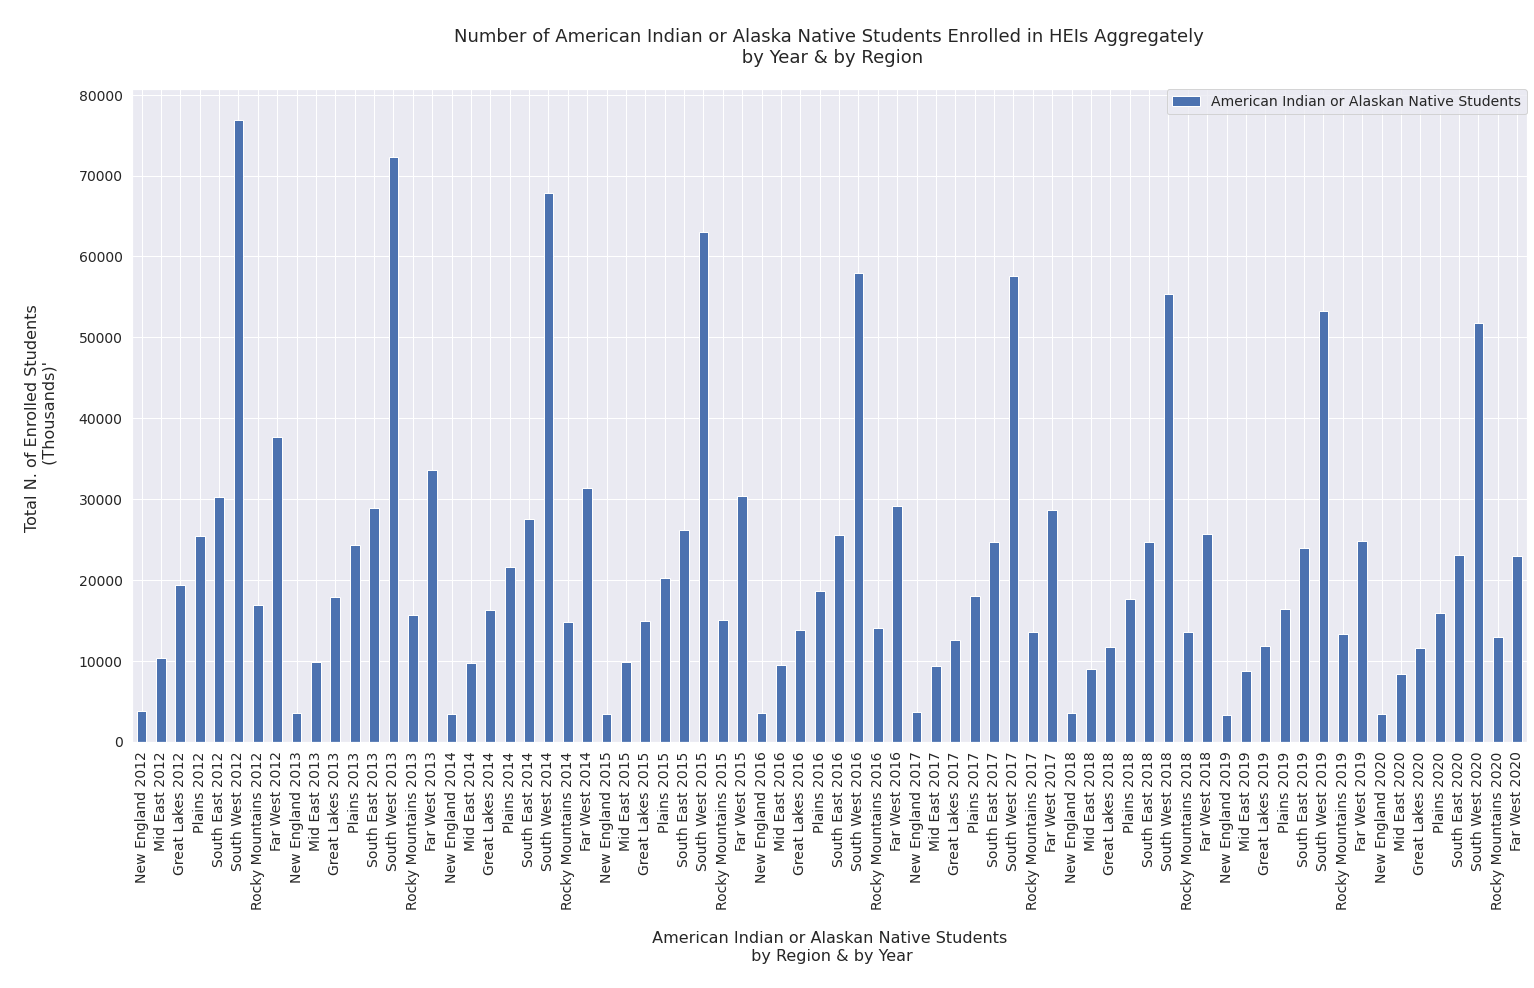

In [37]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

df_trnsp=df_graph1.transpose()
df_trnsp
graph_a1=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a1.set_xlabel("\n American Indian or Alaskan Native Students \n by Region & by Year\n", fontsize=16)
graph_a1.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a1.set_title('\nNumber of American Indian or Alaska Native Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a1.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a1.legend(labels=['American Indian or Alaskan Native Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

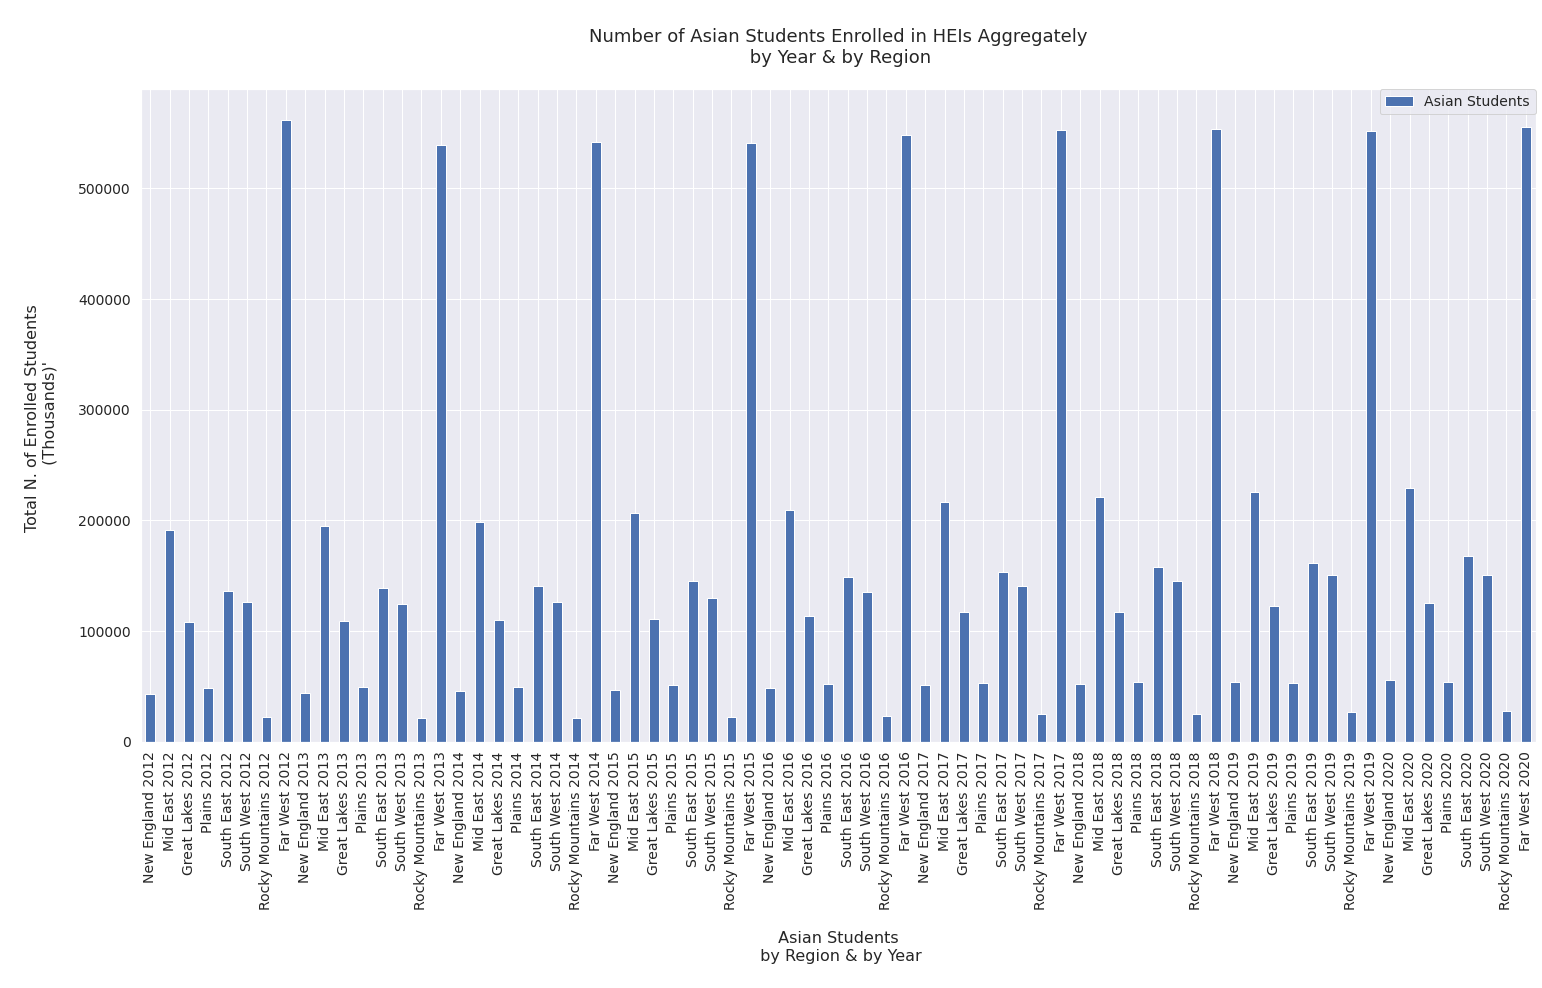

In [38]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total


df_trnsp=df_graph3.transpose()
df_trnsp
graph_a2=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a2.set_xlabel("\n Asian Students \n by Region & by Year\n", fontsize=16)
graph_a2.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a2.set_title('\nNumber of Asian Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a2.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a2.legend(labels=['Asian Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

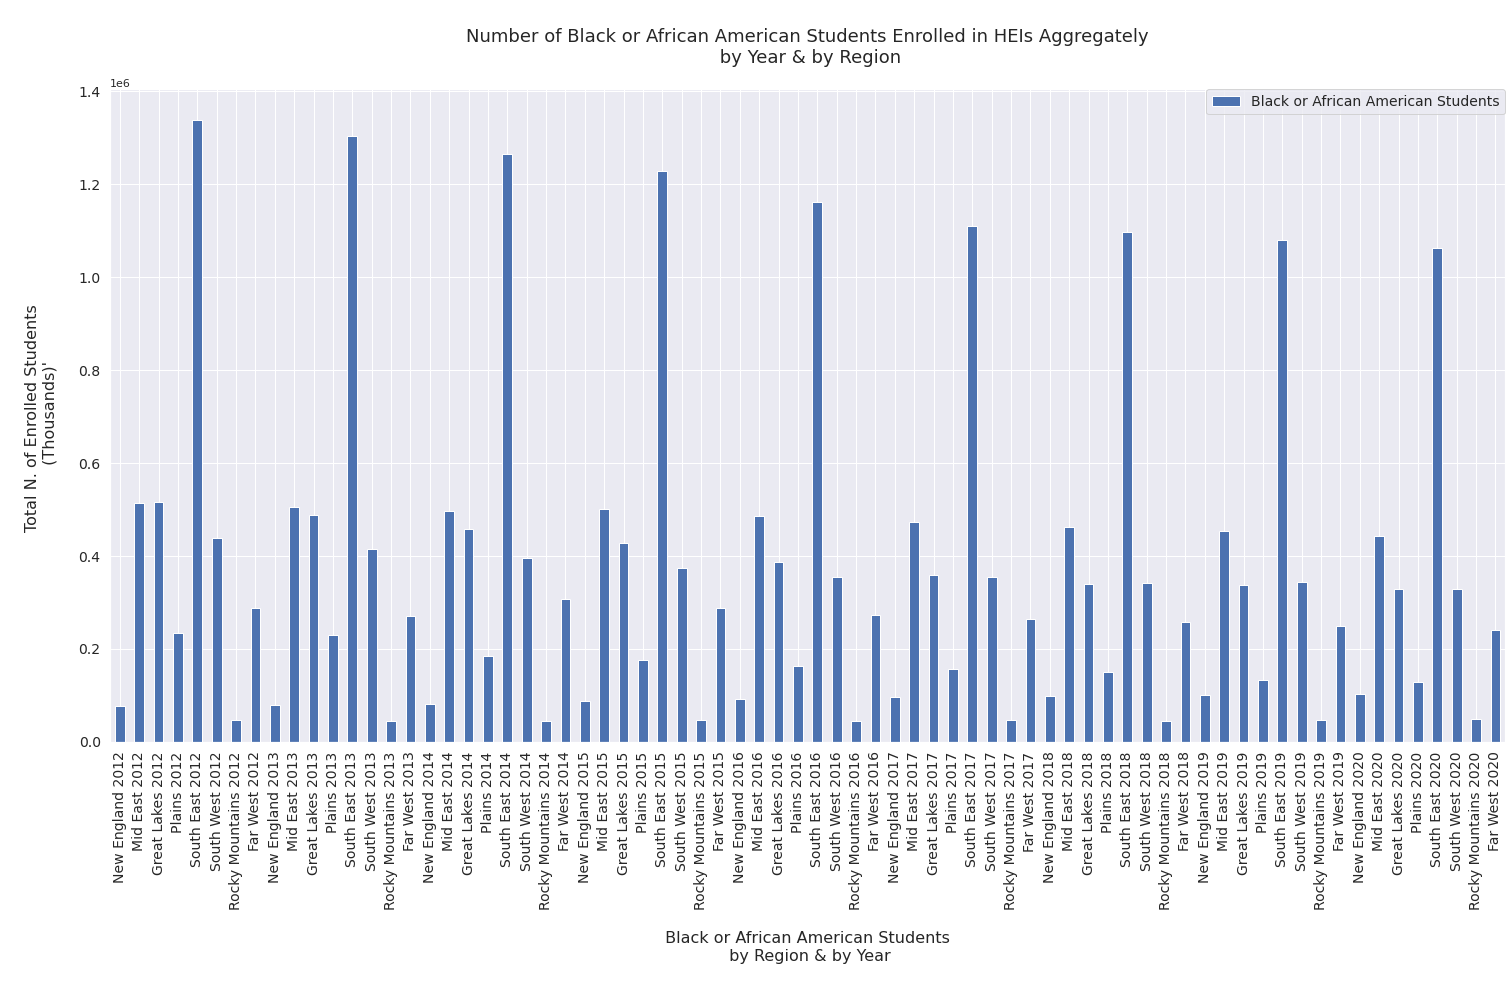

In [39]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total


df_trnsp=df_graph5.transpose()
df_trnsp
graph_a3=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a3.set_xlabel("\n Black or African American Students \n by Region & by Year\n", fontsize=16)
graph_a3.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a3.set_title('\nNumber of Black or African American Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a3.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a3.legend(labels=['Black or African American Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

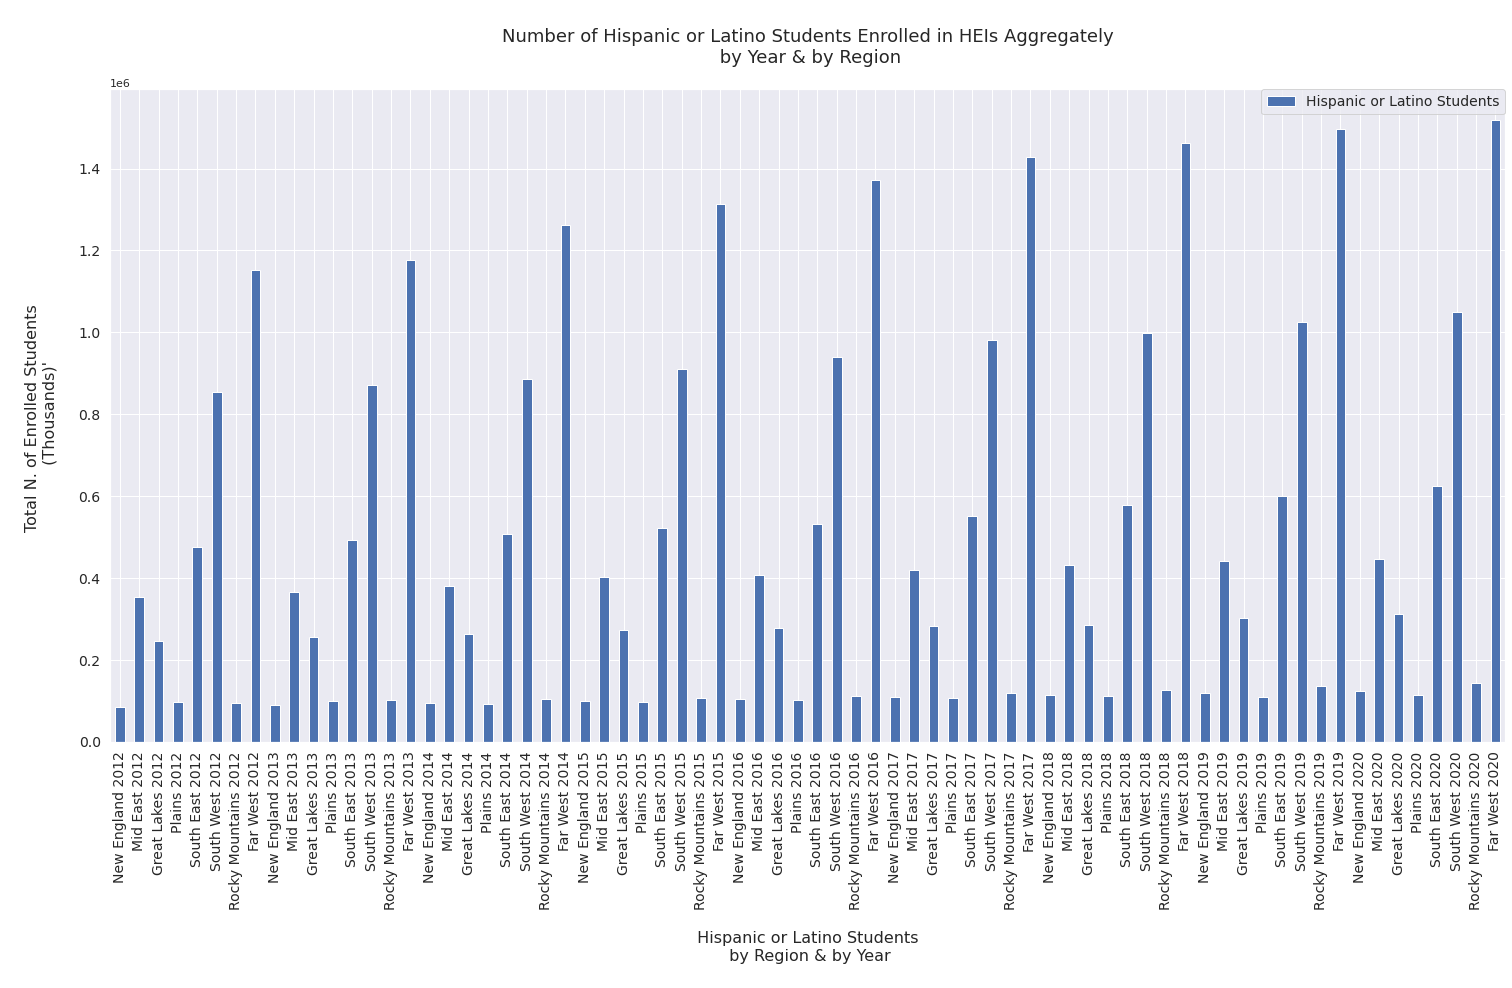

In [40]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total


df_trnsp=df_graph7.transpose()
df_trnsp
graph_a7=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a7.set_xlabel("\n Hispanic or Latino Students \n by Region & by Year\n", fontsize=16)
graph_a7.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a7.set_title('\nNumber of Hispanic or Latino Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a7.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a7.legend(labels=['Hispanic or Latino Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

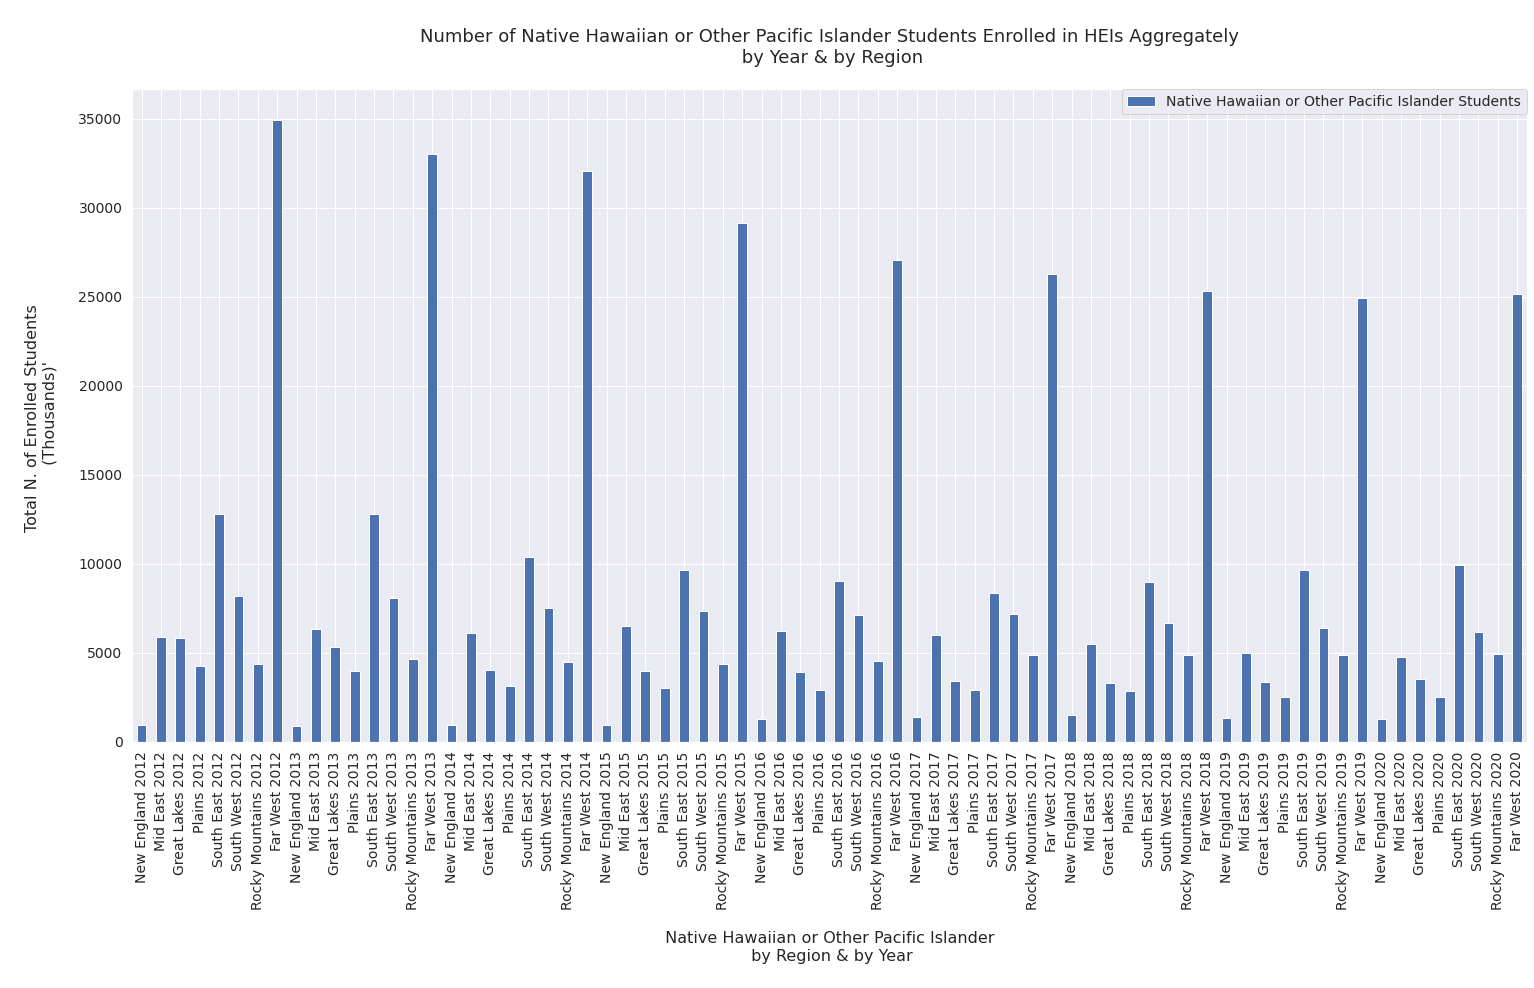

In [41]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total


df_trnsp=df_graph9.transpose()
df_trnsp
graph_a9=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a9.set_xlabel("\n Native Hawaiian or Other Pacific Islander \n by Region & by Year\n", fontsize=16)
graph_a9.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a9.set_title('\nNumber of Native Hawaiian or Other Pacific Islander Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a9.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a9.legend(labels=['Native Hawaiian or Other Pacific Islander Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

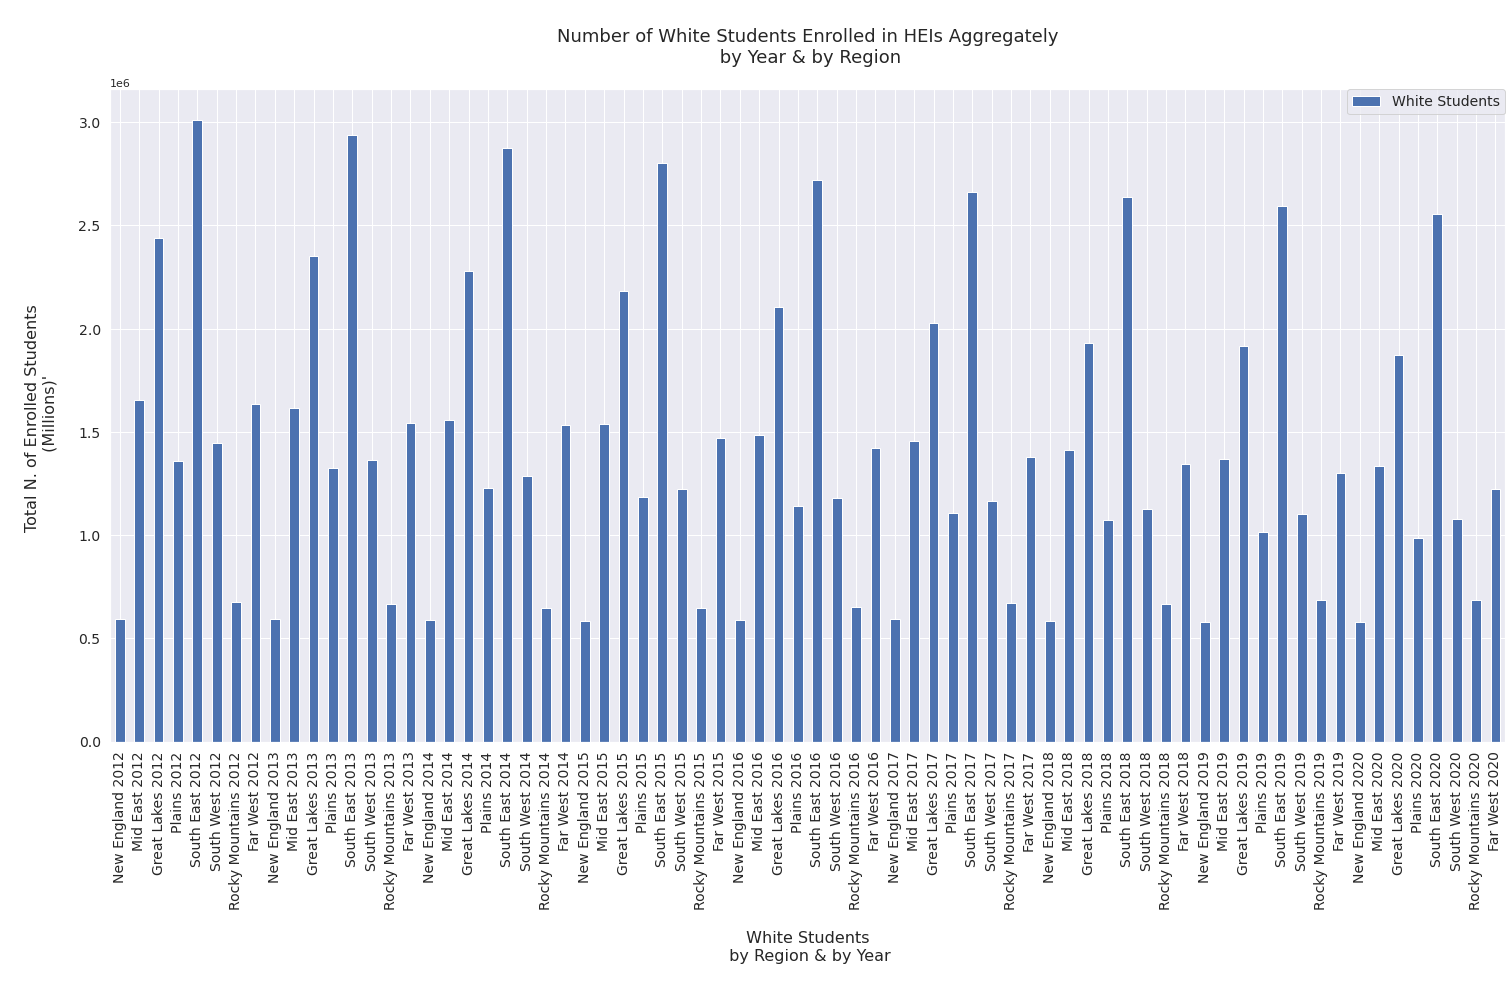

In [76]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

df_trnsp=df_graph11.transpose()
df_trnsp
graph_a11=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a11.set_xlabel("\n White Students \n by Region & by Year\n", fontsize=16)
graph_a11.set_ylabel("\nTotal N. of Enrolled Students \n (Millions)'\n", fontsize=16)
graph_a11.set_title('\nNumber of White Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a11.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a11.legend(labels=['White Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

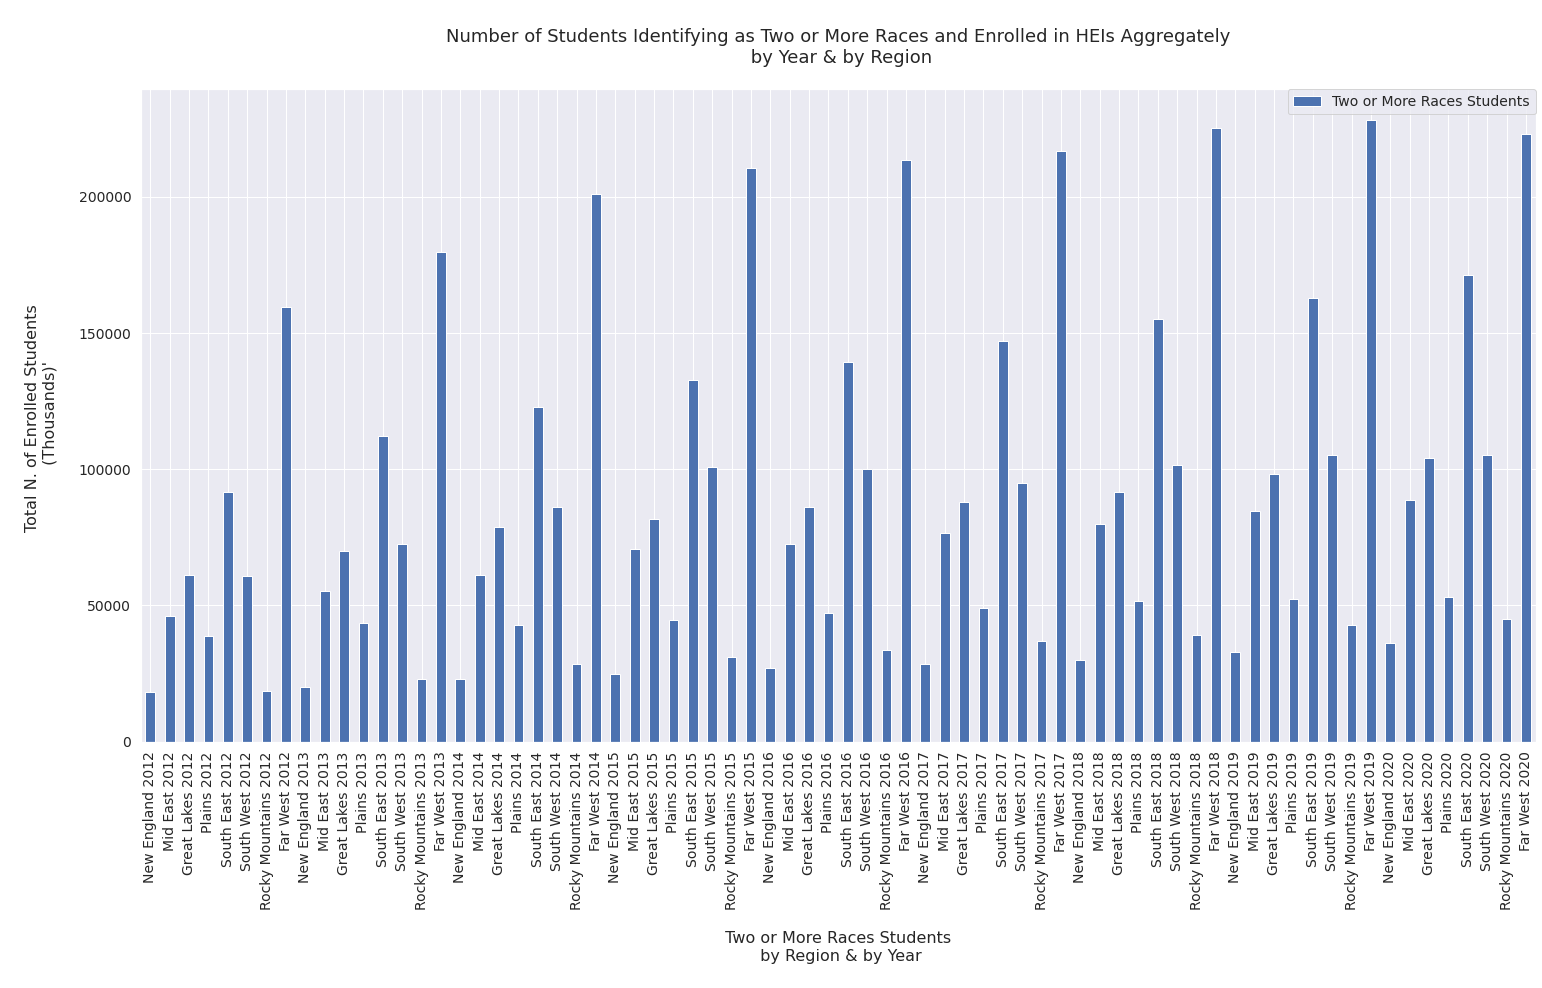

In [43]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

df_trnsp=df_graph13.transpose()
df_trnsp
graph_a13=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a13.set_xlabel("\n Two or More Races Students \n by Region & by Year\n", fontsize=16)
graph_a13.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a13.set_title('\nNumber of Students Identifying as Two or More Races and Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a13.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a13.legend(labels=['Two or More Races Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

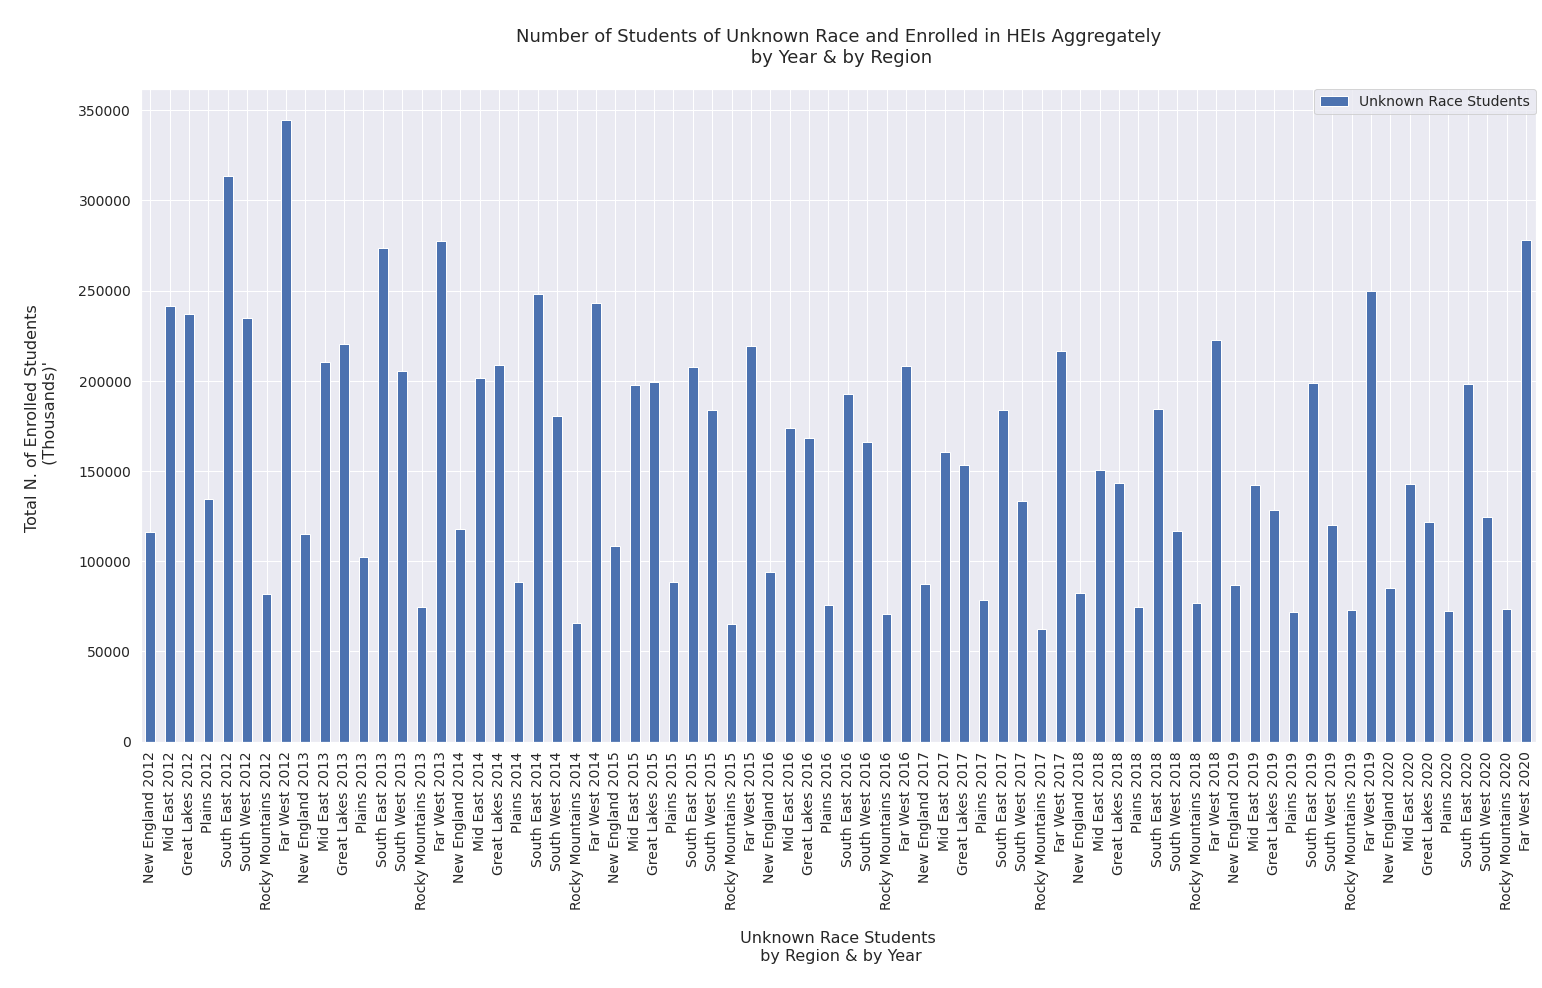

In [44]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

df_trnsp=df_graph15.transpose()
df_trnsp
graph_a15=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a15.set_xlabel("\n Unknown Race Students \n by Region & by Year\n", fontsize=16)
graph_a15.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a15.set_title('\nNumber of Students of Unknown Race and Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a15.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a15.legend(labels=['Unknown Race Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

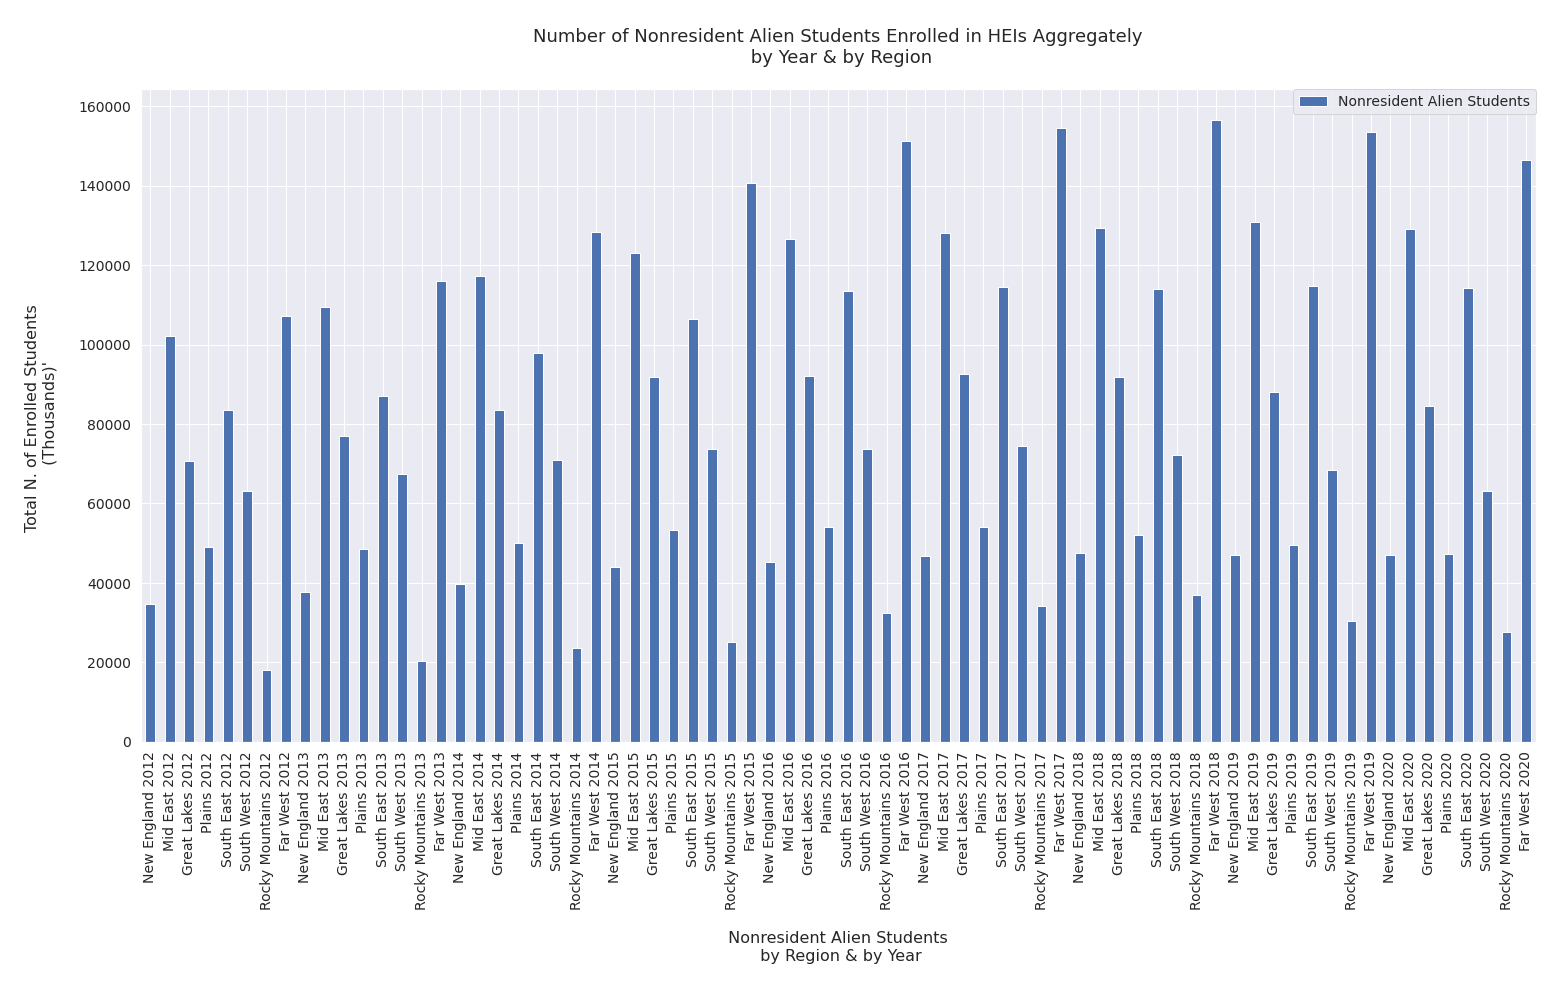

In [75]:
sns.set(rc = {'figure.figsize':(25,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

df_trnsp=df_graph18.transpose()
df_trnsp
graph_a18=df_trnsp.plot(kind='bar', fontsize = 14)

graph_a18.set_xlabel("\n Nonresident Alien Students \n by Region & by Year\n", fontsize=16)
graph_a18.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_a18.set_title('\nNumber of Nonresident Alien Students Enrolled in HEIs Aggregately\n by Year & by Region\n', fontsize=18)
graph_a18.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a18.legend(labels=['Nonresident Alien Students'], fontsize = 14, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0)

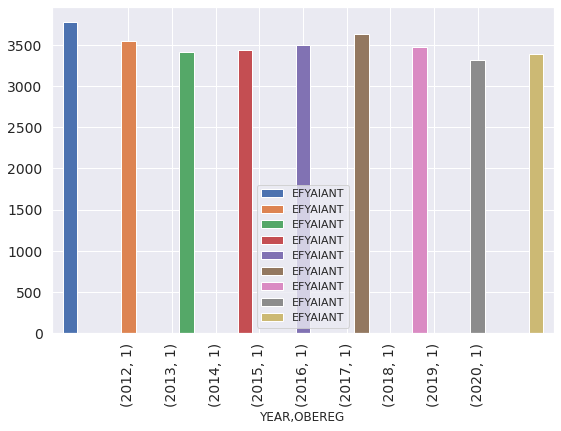

In [46]:
sns.set(rc = {'figure.figsize':(9,6)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
# ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
# cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
# df_graph_1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()  # American Indian or Alaska Native total

df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

# df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

# df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

# df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

# df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

# df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

# df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

# df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

# df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

# df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
#                        df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_trnsp=df_graph1.transpose()
df_trnsp

# graph_a1=df_trnsp[:8].plot(kind='bar', fontsize = 14);

# graph_a2=df_trnsp[8:16].plot(kind='bar', fontsize = 14)
df_concat = pd.concat([df_trnsp[:1],df_trnsp[8:9],df_trnsp[16:17],df_trnsp[24:25],df_trnsp[32:33],df_trnsp[40:41],df_trnsp[48:49],df_trnsp[56:57],df_trnsp[64:65]], axis=1)
graph_comp_AMIND=df_concat.plot(kind='bar', fontsize = 14, width=3)
# graph_comp_AMIND.xaxis.set_ticks([])
# graph_comp_AMIND.set_xlabel("\n American Indian or Alaskan Native Students \n in New England\n by Year\n", fontsize=16)
# graph_comp_AMIND.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
# graph_comp_AMIND.set_title('\nNumber of American Indian or Alaska Native Students Enrolled in HEIs Aggregately\n by Year in New England\n', fontsize=18)
# # graph_comp_AMIND.set_xticklabels(['New England 2012', 'New England 2013',
# #                           'New England 2014','New England 2015',
# #                           'New England 2016','New England 2017','New England 2018',
# #                           'New England 2019','New England 2020'], fontsize = 14 )
# graph_comp_AMIND.legend(labels=['2012', '2013', '2014', '2015', '2016', '2017', '2018','2019','2020'], fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

# graph_c1=df_trnsp[:32].plot(kind='bar', fontsize = 14);

# fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,18))
# fig.suptitle('3 rows x 3 columns axes with no data')


# sns.barplot(ax=axes[0], x=american_indian.index, y=american_indian.values)
# axes[0].set_title(american_indian.name)




# graph_a1.set_xlabel("\nEnrollment By Race & Year\n", fontsize=16)
# graph_a1.set_ylabel("\nTotal N. of Enrolees\n", fontsize=16)
# graph_a1.set_title('\nNumber of Enrollees by Year & Economic Area\n', fontsize=18)

# graph_a1.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
#                           'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
#                           'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
#                           'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
#                           'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
#                           'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
#                           'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
#                           'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
#                           'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
# graph_a1.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
#                         'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
#                 fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

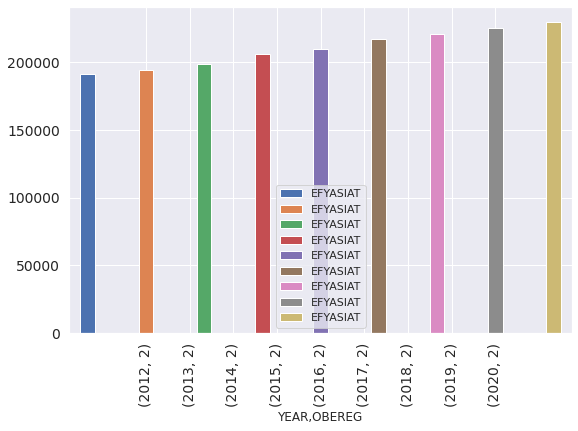

In [47]:
sns.set(rc = {'figure.figsize':(9,6)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

# df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

# df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

# df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

# df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

# df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

# df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

# df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total


df_trnsp=df_graph3.transpose()
df_trnsp

df_concat = pd.concat([df_trnsp[1:2],df_trnsp[9:10],df_trnsp[17:18],df_trnsp[25:26],df_trnsp[33:34],df_trnsp[41:42],df_trnsp[49:50],df_trnsp[57:58],df_trnsp[65:66]], axis=1)
graph_comp_ASIA=df_concat.plot(kind='bar', fontsize = 14, width=3)
# graph_comp_ASIA.xaxis.set_ticks([])
# graph_comp_ASIA.set_xlabel("\nAsian Students in Middle Eastern States by Year\n", fontsize=16)
# graph_comp_ASIA.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)\n", fontsize=16)
# graph_comp_ASIA.set_title('\nNumber of Asian Students Enrolled in HEIs Aggregately\n by Year in Middle Eastern States\n', fontsize=18)
# graph_comp_ASIA.legend(labels=['2012', '2013', '2014', '2015', '2016', '2017', '2018','2019','2020'], fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

# graph_c1=df_trnsp[:32].plot(kind='bar', fontsize = 14);

# fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,18))
# fig.suptitle('3 rows x 3 columns axes with no data')


# sns.barplot(ax=axes[0], x=american_indian.index, y=american_indian.values)
# axes[0].set_title(american_indian.name)




# graph_a1.set_xlabel("\nEnrollment By Race & Year\n", fontsize=16)
# graph_a1.set_ylabel("\nTotal N. of Enrolees\n", fontsize=16)
# graph_a1.set_title('\nNumber of Enrollees by Year & Economic Area\n', fontsize=18)

# graph_a1.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
#                           'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
#                           'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
#                           'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
#                           'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
#                           'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
#                           'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
#                           'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
#                           'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
# graph_a1.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
#                         'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
#                 fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

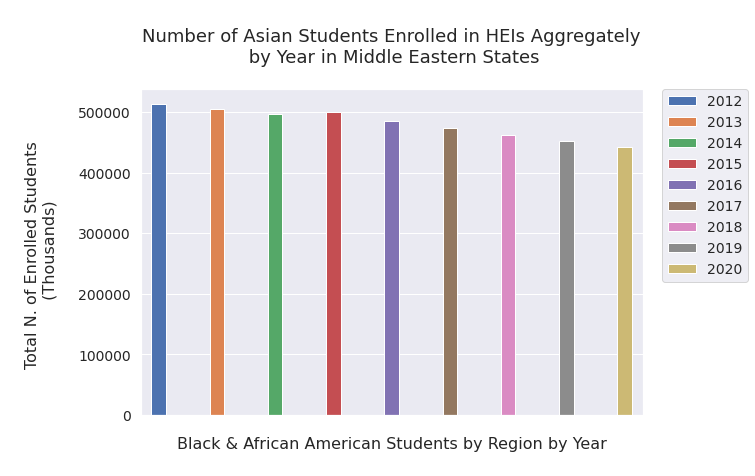

In [48]:
sns.set(rc = {'figure.figsize':(9,6)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)

df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

# df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

# df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

# df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

# df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

# df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

# df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total


df_trnsp=df_graph5.transpose()
df_trnsp

df_concat = pd.concat([df_trnsp[1:2],df_trnsp[9:10],df_trnsp[17:18],df_trnsp[25:26],df_trnsp[33:34],df_trnsp[41:42],df_trnsp[49:50],df_trnsp[57:58],df_trnsp[65:66]], axis=1)
graph_comp_BLACK=df_concat.plot(kind='bar', fontsize = 14, width=3)
graph_comp_BLACK.xaxis.set_ticks([])
graph_comp_BLACK.set_xlabel("\nBlack & African American Students by Region by Year\n", fontsize=16)
graph_comp_BLACK.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)\n", fontsize=16)
graph_comp_BLACK.set_title('\nNumber of Asian Students Enrolled in HEIs Aggregately\n by Year in Middle Eastern States\n', fontsize=18)
graph_comp_BLACK.legend(labels=['2012', '2013', '2014', '2015', '2016', '2017', '2018','2019','2020'], fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

# graph_c1=df_trnsp[:32].plot(kind='bar', fontsize = 14);

# fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,18))
# fig.suptitle('3 rows x 3 columns axes with no data')


# sns.barplot(ax=axes[0], x=american_indian.index, y=american_indian.values)
# axes[0].set_title(american_indian.name)




# graph_a1.set_xlabel("\nEnrollment By Race & Year\n", fontsize=16)
# graph_a1.set_ylabel("\nTotal N. of Enrolees\n", fontsize=16)
# graph_a1.set_title('\nNumber of Enrollees by Year & Economic Area\n', fontsize=18)

# graph_a1.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
#                           'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
#                           'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
#                           'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
#                           'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
#                           'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
#                           'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
#                           'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
#                           'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
# graph_a1.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
#                         'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
#                 fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

In [53]:
# sns.set(rc = {'figure.figsize':(30,12)})

# df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
# df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
# # ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
# # cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
# # df_graph_1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()  # American Indian or Alaska Native total

# df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

# df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

# df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

# df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

# df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

# df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

# df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

# df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

# df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

# df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
#                        df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

# df_trnsp=df_concat.transpose(copy=True)
# df_trnsp

# graph_a1=df_trnsp.plot(kind='bar', fontsize = 14)

# fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,18))
# fig.suptitle('3 rows x 3 columns axes with no data')




# # graph_a1.set_xlabel("\nYear\n", fontsize=16)
# graph_a1.set_ylabel("\nTotal N. of Enrolled Students \n (Tens of Millions)'\n", fontsize=16)
# graph_a1.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Race, Year, & Economic Area \n', fontsize=18)

# graph_a1.set_xlabel("\nEnrollment By Race & Year\n", fontsize=16)
# graph_a1.set_ylabel("\nTotal N. of Enrolees\n", fontsize=16)
# # graph_a1.set_title('\nNumber of Enrollees by Year & Economic Area\n', fontsize=18)

# # graph_a1.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
# #                           'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
# #                           'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
# #                           'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
# #                           'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
# #                           'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
# #                           'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
# #                           'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
# #                           'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
# # graph_a1.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
# #                         'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
# #                 fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

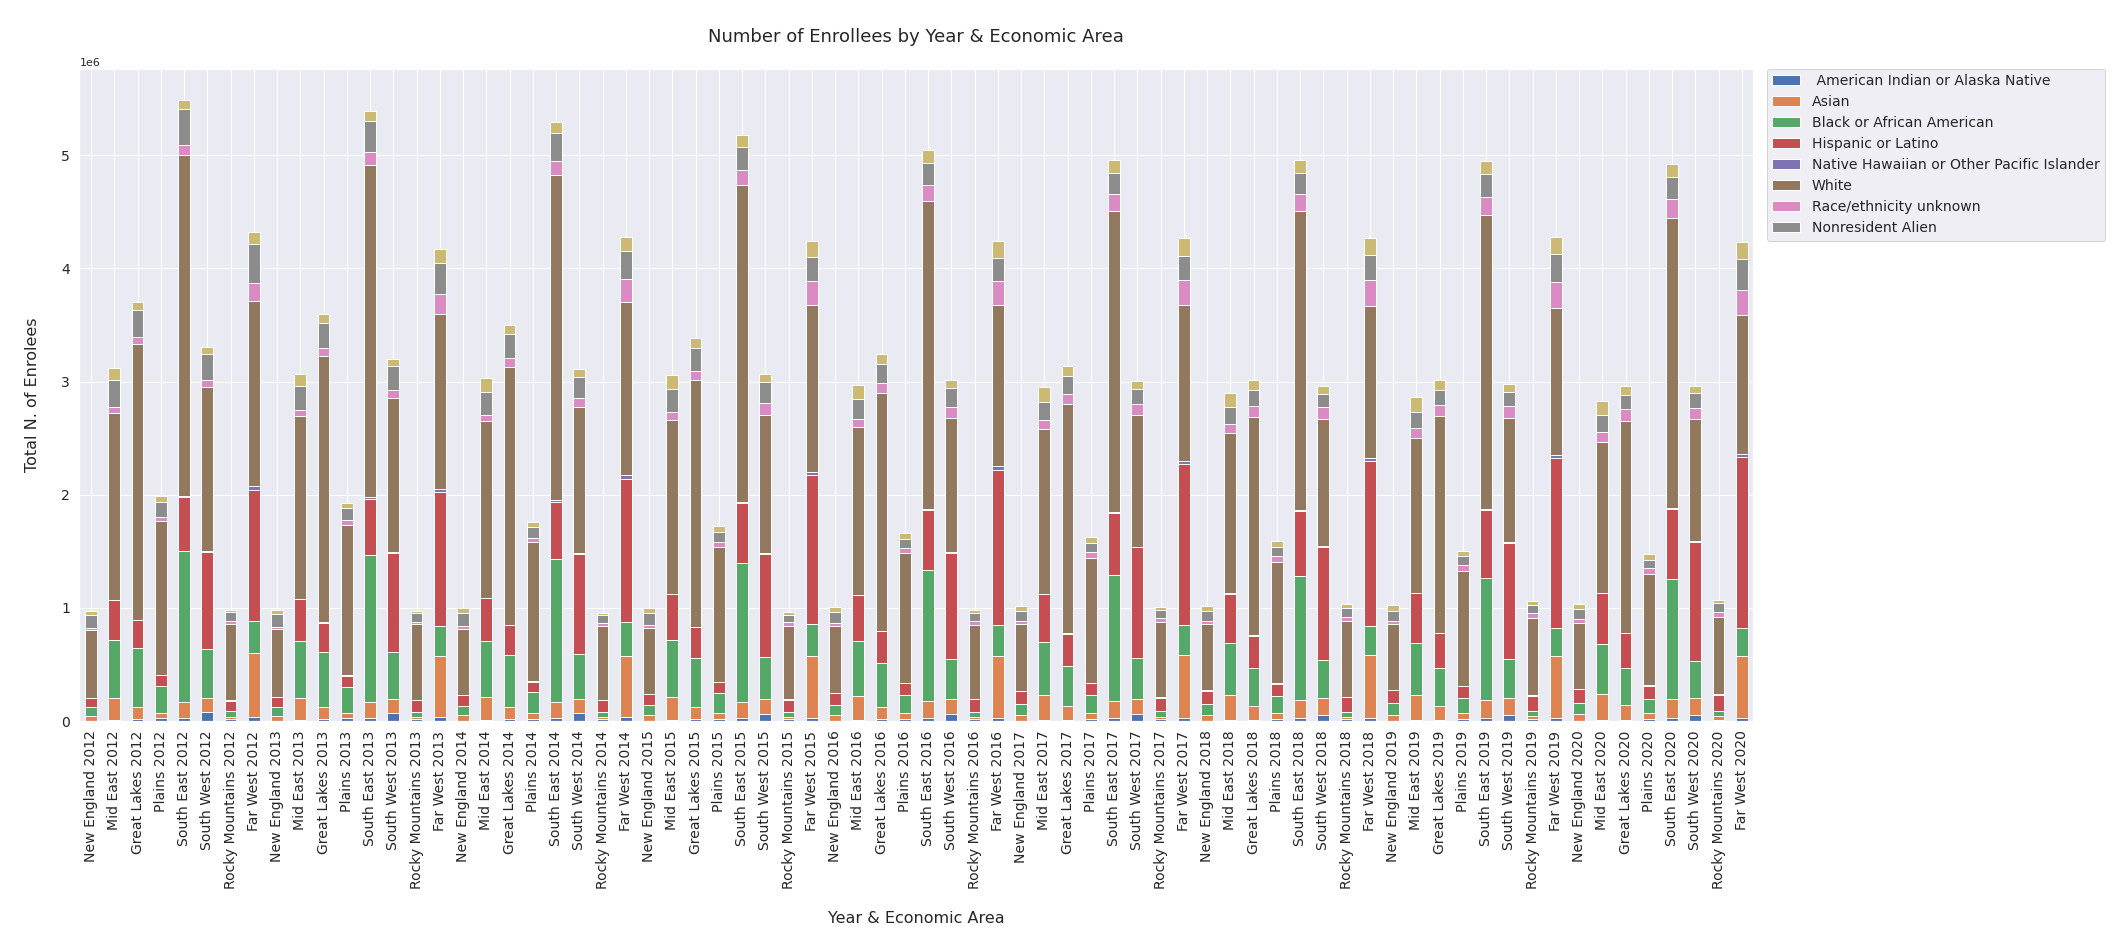

In [50]:
sns.set(rc = {'figure.figsize':(30,12)})

df_nn = (df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]).copy(deep=False)
df_newn =(df_nn.loc[lambda df_nn:((df_nn['OBEREG']!=0)&(df_nn['OBEREG']!=9)),:]).copy(deep=False)
# ddf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2012),:]
# cdf = df_newn.loc[lambda df_newn:(df_newn['YEAR']==2020),:]
# df_graph_1 = df.groupby(['YEAR'])['EFYTOTLT'].sum()  # American Indian or Alaska Native total

df_graph1 = df_newn.groupby(['YEAR','OBEREG' ])['EFYAIANT'].sum()  # American Indian or Alaska Native total

df_graph3 = df_newn.groupby(['YEAR','OBEREG' ])['EFYASIAT'].sum()  # Asian total

df_graph5 = df_newn.groupby(['YEAR','OBEREG' ])['EFYBKAAT'].sum() # Black or African American total

df_graph7 = df_newn.groupby(['YEAR','OBEREG' ])['EFYHISPT'].sum() # Hispanic or Latino total

df_graph9 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

df_graph11 = df_newn.groupby(['YEAR','OBEREG' ])['EFYWHITT'].sum() # White total

df_graph13 = df_newn.groupby(['YEAR','OBEREG' ])['EFY2MORT'].sum() # Two or more races total

df_graph15 = df_newn.groupby(['YEAR','OBEREG' ])['EFYUNKNT'].sum() # Race/ethnicity unknown total

df_graph18 = df_newn.groupby(['YEAR','OBEREG' ])['EFYNRALT'].sum() # Nonresident alien total

df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
                       df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_concat
graph_a1=df_concat.plot(kind='bar', stacked = True, fontsize = 14)



# graph_a1=df_graph_1.plot(kind='line', fontsize = 14)


graph_a1.set_xlabel("\nYear\n", fontsize=16)
graph_a1.set_ylabel("\nTotal N. of Enrolled Students \n (Tens of Millions)'\n", fontsize=16)
graph_a1.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Year &  By Economic Area \n', fontsize=18)

graph_a1.set_xlabel("\nYear & Economic Area\n", fontsize=16)
graph_a1.set_ylabel("\nTotal N. of Enrolees\n", fontsize=16)
graph_a1.set_title('\nNumber of Enrollees by Year & Economic Area\n', fontsize=18)

graph_a1.set_xticklabels(['New England 2012','Mid East 2012','Great Lakes 2012','Plains 2012','South East 2012','South West 2012','Rocky Mountains 2012','Far West 2012',
                          'New England 2013','Mid East 2013','Great Lakes 2013','Plains 2013','South East 2013','South West 2013','Rocky Mountains 2013','Far West 2013',
                          'New England 2014','Mid East 2014','Great Lakes 2014','Plains 2014','South East 2014','South West 2014','Rocky Mountains 2014','Far West 2014',
                          'New England 2015','Mid East 2015','Great Lakes 2015','Plains 2015','South East 2015','South West 2015','Rocky Mountains 2015','Far West 2015',
                          'New England 2016','Mid East 2016','Great Lakes 2016','Plains 2016','South East 2016','South West 2016','Rocky Mountains 2016','Far West 2016',
                          'New England 2017','Mid East 2017','Great Lakes 2017','Plains 2017','South East 2017','South West 2017','Rocky Mountains 2017','Far West 2017',
                          'New England 2018','Mid East 2018','Great Lakes 2018','Plains 2018','South East 2018','South West 2018','Rocky Mountains 2018','Far West 2018',
                          'New England 2019','Mid East 2019','Great Lakes 2019','Plains 2019','South East 2019','South West 2019','Rocky Mountains 2019','Far West 2019',
                          'New England 2020','Mid East 2020','Great Lakes 2020','Plains 2020','South East 2020','South West 2020','Rocky Mountains 2020','Far West 2020'], fontsize = 14)
graph_a1.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
                        'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
                fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_in_HEIS_by_EconArea_by_Year.png")

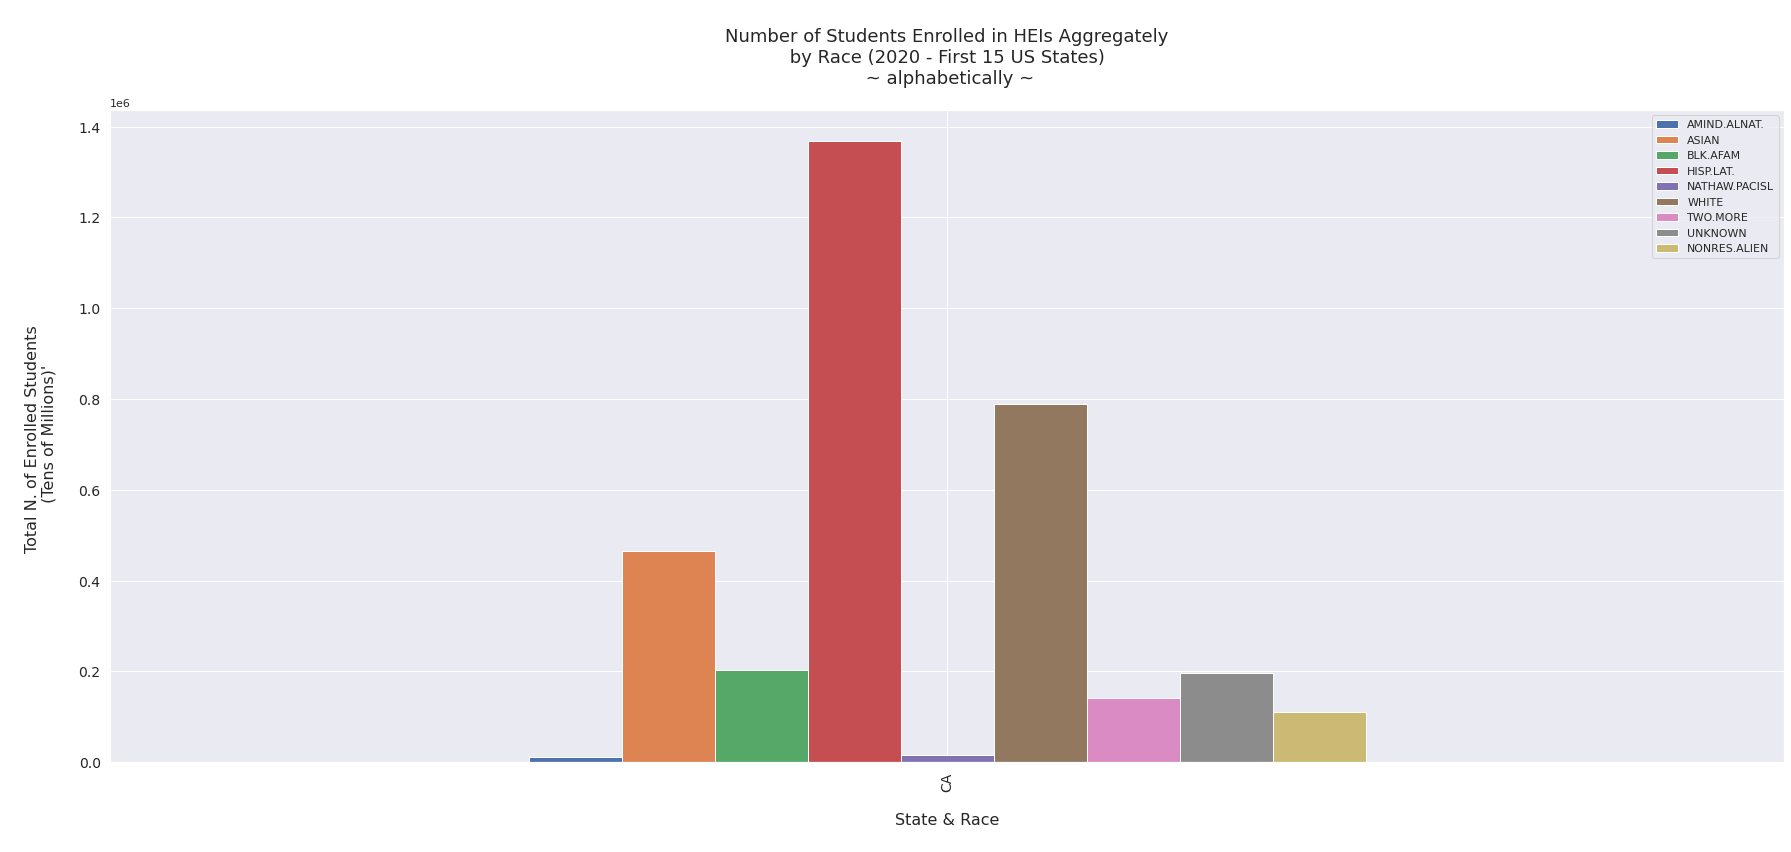

In [60]:
sns.set(rc = {'figure.figsize':(30,12)})

df_nn = df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:].copy(deep=False)
d=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:] #.groupby(['UNITID'])
c=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:]
labels = d['STABBR']
# print(labels)

#2012
df_graph1 = d.groupby(['STABBR'])['EFYAIANT'].sum()  # American Indian or Alaska Native total
df_graph3 = d.groupby(['STABBR'])['EFYASIAT'].sum()  # Asian total
df_graph5 = d.groupby(['STABBR'])['EFYBKAAT'].sum() # Black or African American total
df_graph7 = d.groupby(['STABBR'])['EFYHISPT'].sum() # Hispanic or Latino total
df_graph9 = d.groupby(['STABBR'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total
df_graph11 = d.groupby(['STABBR'])['EFYWHITT'].sum() # White total
df_graph13 = d.groupby(['STABBR'])['EFY2MORT'].sum() # Two or more races total
df_graph15 = d.groupby(['STABBR'])['EFYUNKNT'].sum() # Race/ethnicity unknown total
df_graph18 = d.groupby(['STABBR'])['EFYNRALT'].sum() # Nonresident alien total

#2020
df_graph1c = c.groupby(['STABBR'])['EFYAIANT'].sum()  # American Indian or Alaska Native total
df_graph3c = c.groupby(['STABBR'])['EFYASIAT'].sum()  # Asian total
df_graph5c = c.groupby(['STABBR'])['EFYBKAAT'].sum() # Black or African American total
df_graph7c = c.groupby(['STABBR'])['EFYHISPT'].sum() # Hispanic or Latino total
df_graph9c = c.groupby(['STABBR'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total
df_graph11c = c.groupby(['STABBR'])['EFYWHITT'].sum() # White total
df_graph13c = c.groupby(['STABBR'])['EFY2MORT'].sum() # Two or more races total
df_graph15c = c.groupby(['STABBR'])['EFYUNKNT'].sum() # Race/ethnicity unknown total
df_graph18c = c.groupby(['STABBR'])['EFYNRALT'].sum() # Nonresident alien total

df_concat_2020 = pd.concat([df_graph1c, df_graph3c, df_graph5c, df_graph7c, df_graph9c, 
                             df_graph11c, df_graph13c, df_graph15c, df_graph18c], axis=1)
# 
df_concat_2012 = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
                       df_graph11, df_graph13, df_graph15, df_graph18], axis=1)

df_concat_2020.rename(columns={'EFYAIANT':"AMIND.ALNAT.", 'EFYASIAT':"ASIAN", 'EFYBKAAT':"BLK.AFAM", 'EFYHISPT':"HISP.LAT.", 'EFYNHPIT':"NATHAW.PACISL", 
                               'EFYWHITT':"WHITE",'EFY2MORT':"TWO.MORE", 'EFYUNKNT':"UNKNOWN", 'EFYNRALT':"NONRES.ALIEN"}, errors="raise", inplace=True)

df_concat_2012.rename(columns={'EFYAIANT':"AMIND.ALNAT.", 'EFYASIAT':"ASIAN", 'EFYBKAAT':"BLK.AFAM", 'EFYHISPT':"HISP.LAT.", 'EFYNHPIT':"NATHAW.PACISL", 
                               'EFYWHITT':"WHITE",'EFY2MORT':"TWO.MORE", 'EFYUNKNT':"UNKNOWN", 'EFYNRALT':"NONRES.ALIEN"}, errors="raise", inplace=True)


graph_ac=(df_concat_2020[5:6]).plot(kind='bar', fontsize = 14)


graph_ac.set_xlabel("\nState & Race\n", fontsize=16)
graph_ac.set_ylabel("\nTotal N. of Enrolled Students \n (Tens of Millions)'\n", fontsize=16)
graph_ac.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Race (2020 - First 15 US States) \n ~ alphabetically ~\n', fontsize=18)



plt.show()

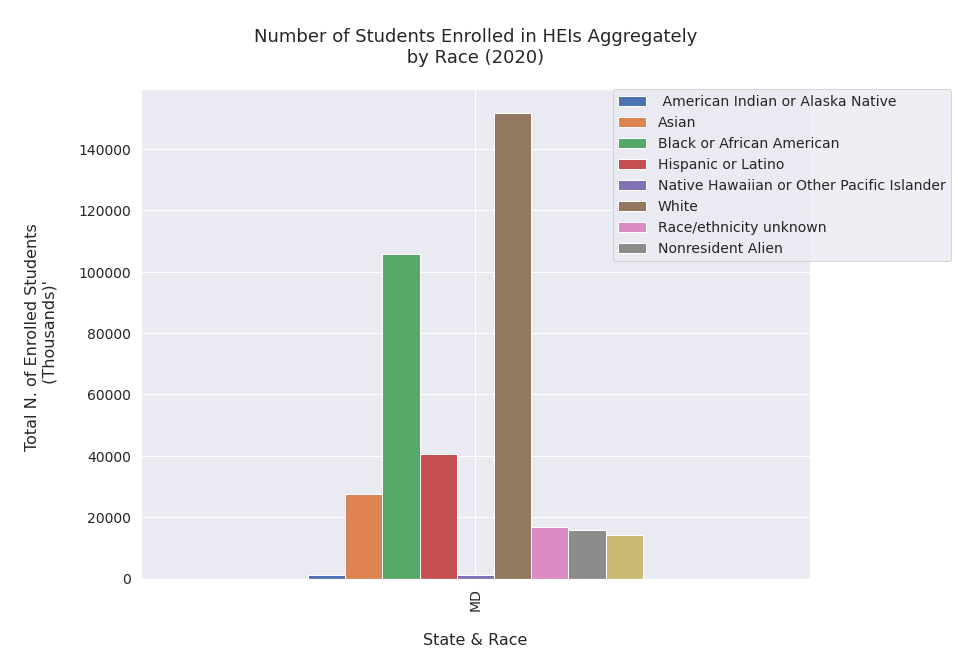

In [72]:
sns.set(rc = {'figure.figsize':(12,9)})

df_nn = df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:].copy(deep=False)
# df_nn['INSTSIZE'].value_counts()
# d=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:].groupby(['STABBR'])['UNITID'].count()
# c=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:].groupby(['STABBR'])['UNITID'].count()
# print(d)
# print(c)
# d=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2012),:] #.groupby(['UNITID'])
c=df_nn.loc[lambda df_nn:(df_nn['YEAR']==2020),:]
# d.head()

# df_graph1 = d.groupby(['STABBR'])['EFYAIANT'].sum()  # American Indian or Alaska Native total

# df_graph3 = d.groupby(['STABBR'])['EFYASIAT'].sum()  # Asian total

# df_graph5 = d.groupby(['STABBR'])['EFYBKAAT'].sum() # Black or African American total

# df_graph7 = d.groupby(['STABBR'])['EFYHISPT'].sum() # Hispanic or Latino total

# df_graph9 = d.groupby(['STABBR'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

# df_graph11 = d.groupby(['STABBR'])['EFYWHITT'].sum() # White total

# df_graph13 = d.groupby(['STABBR'])['EFY2MORT'].sum() # Two or more races total

# df_graph15 = d.groupby(['STABBR'])['EFYUNKNT'].sum() # Race/ethnicity unknown total

# df_graph18 = d.groupby(['STABBR'])['EFYNRALT'].sum() # Nonresident alien total

# df_concat = pd.concat([df_graph1, df_graph3, df_graph5, df_graph7, df_graph9, 
#                        df_graph11, df_graph13, df_graph15, df_graph18], axis=1)


# df_concat
# graph_acc=df_concat[:15].plot(kind='bar', fontsize = 14)

df_graph1c = c.groupby(['STABBR'])['EFYAIANT'].sum()  # American Indian or Alaska Native total

df_graph3c = c.groupby(['STABBR'])['EFYASIAT'].sum()  # Asian total

df_graph5c = c.groupby(['STABBR'])['EFYBKAAT'].sum() # Black or African American total

df_graph7c = c.groupby(['STABBR'])['EFYHISPT'].sum() # Hispanic or Latino total

df_graph9c = c.groupby(['STABBR'])['EFYNHPIT'].sum() # Native Hawaiian or Other Pacific Islander total

df_graph11c = c.groupby(['STABBR'])['EFYWHITT'].sum() # White total

df_graph13c = c.groupby(['STABBR'])['EFY2MORT'].sum() # Two or more races total

df_graph15c = c.groupby(['STABBR'])['EFYUNKNT'].sum() # Race/ethnicity unknown total

df_graph18c = c.groupby(['STABBR'])['EFYNRALT'].sum() # Nonresident alien total

df_concat_c = pd.concat([df_graph1c, df_graph3c, df_graph5c, df_graph7c, df_graph9c, 
                       df_graph11c, df_graph13c, df_graph15c, df_graph18c], axis=1)


df_concat_c
graph_ac=df_concat_c[23:24].plot(kind='bar', fontsize = 14)


graph_ac.set_xlabel("\nState & Race\n", fontsize=16)
graph_ac.set_ylabel("\nTotal N. of Enrolled Students \n (Thousands)'\n", fontsize=16)
graph_ac.set_title('\nNumber of Students Enrolled in HEIs Aggregately\n by Race (2020) \n', fontsize=18)
# graph_ac.set_xticks(ticks=['American Indian','Asian','Black','Hispanic','White','Two or More','Unknown','Non-Resident Alien'])


graph_ac.legend(labels=[' American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 
                        'Native Hawaiian or Other Pacific Islander', 'White', 'Race/ethnicity unknown', 'Nonresident Alien'], 
                fontsize = 14, bbox_to_anchor=(1.21, 1), loc='upper right', borderaxespad=0)

# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/N_of_Students_Enrolled_in_HEIS_by_Race_and_by_Year.png")



### Before looking at the correlation matrix through the heat Map for our data, let us slice out of our DF the data pertaining to the racial disaggregation of student enrollment - this data would be naturally correlated with the total number of enrollees which is our target variable

In [144]:
# df.columns


In [145]:
# df_1['STABBR'].value_counts()

In [146]:
# df_1['LOCALE'].value_counts()

In [147]:
################################### CODE TO DECIDE IF WE WANT TO CUT OUT  Undisclosed locales ########################################

### Let us slice out of our DF the data relative to HEIs located outside the continental USA and located in areas that are not identified

# # Slicing the data to exclude HEIs located in an undefined area (mostly this corresponds to HEIs that are located outside the COntinental USA)

# df_continental=df.loc[lambda df:(df['LOCALE']!=-3,:]
# df_11=df_continental.copy(deep=False)
# df_11

In [148]:
# df_1 = df_11[df_11.columns[~df_11.columns.isin(['EFYTOTLM','EFYTOTLW', 'EFYAIANT', 'EFYAIANM', 'EFYAIANW', 'EFYASIAT', 'EFYASIAM',
#                                        'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM', 'EFYBKAAW', 'EFYHISPT', 'EFYHISPM',
#                                        'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM', 'EFYNHPIW', 'EFYWHITT', 'EFYWHITM',
#                                        'EFYWHITW', 'EFY2MORT', 'EFY2MORM', 'EFY2MORW', 'EFYUNKNT', 'EFYUNKNM',
#                                        'EFYUNKNW', 'EFYNRALT', 'EFYNRALM', 'EFYNRALW'])]]

df_1 = df[df.columns[~df.columns.isin(['EFYTOTLM','EFYTOTLW', 'EFYAIANT', 'EFYAIANM', 'EFYAIANW', 'EFYASIAT', 'EFYASIAM',
                                       'EFYASIAW', 'EFYBKAAT', 'EFYBKAAM', 'EFYBKAAW', 'EFYHISPT', 'EFYHISPM',
                                       'EFYHISPW', 'EFYNHPIT', 'EFYNHPIM', 'EFYNHPIW', 'EFYWHITT', 'EFYWHITM',
                                       'EFYWHITW', 'EFY2MORT', 'EFY2MORM', 'EFY2MORW', 'EFYUNKNT', 'EFYUNKNM',
                                       'EFYUNKNW', 'EFYNRALT', 'EFYNRALM', 'EFYNRALW'])]]

# df_1 = Institutional data

In [149]:
# df_2 = df_11[df_11.columns[~df_11.columns.isin(['CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7','SLO83', 'SLO9',
#                                        'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
#                                        'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
#                                        'ALLONCAM', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',
#                                        'DSTNUGP', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
#                                        'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM','ACTNUM', ])]]

df_2 = df[df.columns[~df.columns.isin(['CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7','SLO83', 'SLO9',
                                       'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
                                       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
                                       'ALLONCAM', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',
                                       'DSTNUGP', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
                                       'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM','ACTNUM', ])]]

# df_2 = Enrollment data 

In [150]:
# df_1.head()
# df_1.columns

In [151]:
# df_2.columns

### This graph shows the correlation of the variables - However it is considering most variables as numerical when in fact they are categorical in nature - It is included here just for initial analysis' purposes. 

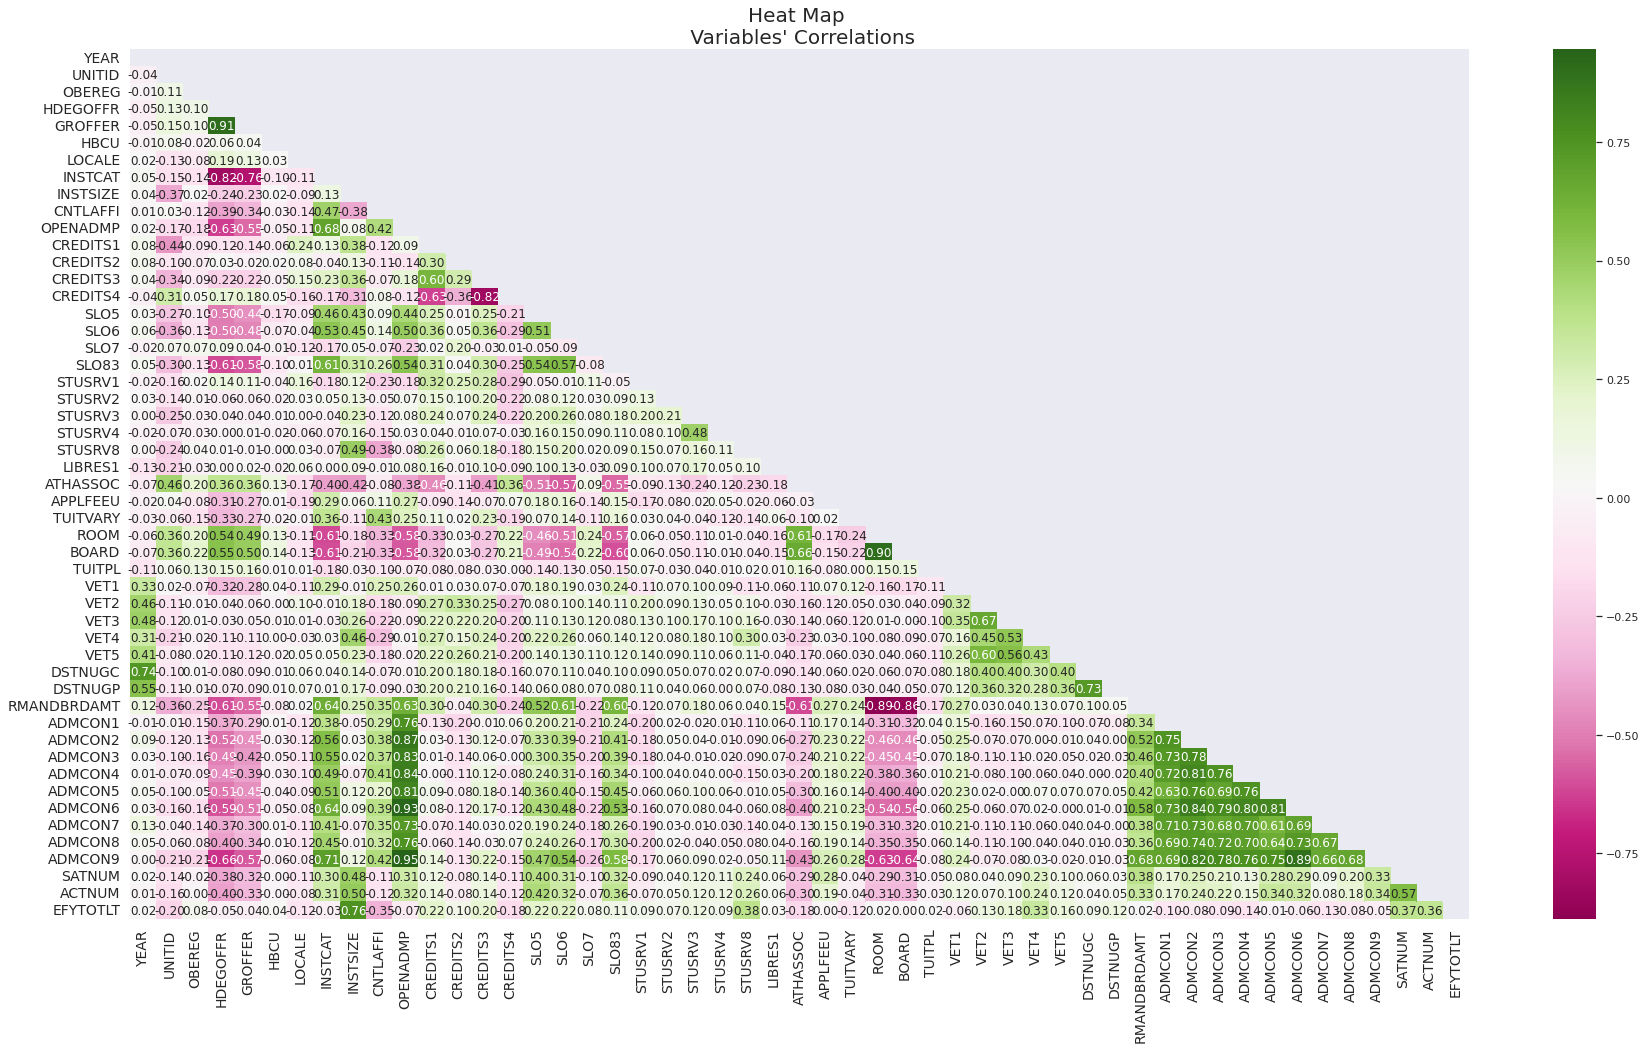

In [152]:
sns.set(rc = {'figure.figsize':(30,16)})
mask = np.triu(np.ones_like(df_1.corr(), dtype=bool))
# sns.palplot(sns.diverging_palette(200, 100, n=11))
sns.heatmap(df_1.corr(), mask =mask, annot=True, fmt=".2f",cmap="PiYG")


plt.title("Heat Map \n Variables' Correlations", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [153]:
df_1.describe(include='object').round(decimals=2)

,STABBR,INSTNM
count,34559,34559
unique,59,5292
top,CA,Stevens-Henager College
freq,3177,45


In [154]:
df_1.describe().round(decimals=2)

,YEAR,UNITID,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,INSTSIZE,CNTLAFFI,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
count,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,...,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00,34559.00
mean,2015.83,237904.43,4.59,27.18,1.55,1.97,20.65,1.52,2.13,2.16,...,0.58,1.02,1.09,1.40,0.92,0.75,1.47,200.76,195.26,5905.75
std,2.57,116378.21,2.15,11.03,0.50,0.16,10.20,0.50,1.16,1.17,...,0.68,1.18,1.30,1.46,1.23,0.97,1.51,634.81,595.17,10329.63
min,2012.00,100654.00,0.00,11.00,1.00,1.00,-3.00,1.00,-2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2014.00,157076.00,3.00,20.00,1.00,2.00,12.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,754.00
50%,2016.00,199607.00,5.00,30.00,2.00,2.00,21.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,2174.00
75%,2018.00,240596.00,6.00,40.00,2.00,2.00,31.00,2.00,3.00,3.00,...,1.00,2.00,2.00,3.00,1.00,1.00,3.00,61.00,102.00,6647.50
max,2020.00,496186.00,9.00,40.00,2.00,2.00,43.00,2.00,5.00,4.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,12350.00,7265.00,359464.00


In [155]:
df_1.to_csv("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_institutional_data_allyrs.csv", index=False)

In [156]:
df_2.to_csv("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_enrollment_data_allyrs.csv", index=False)